# Анализ бизнес-показателей приложения Procrastinate Pro+

## Цель исследования: несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.

### Описание данных:

- Датасет `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта
- Датасет `orders_info_short.csv` — информацию о заказах
- Датасет `costs_info_short.csv` — информацию о расходах на рекламу

Структура `visits_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.


### План проведения анализа:

Шаг 1. Загрузить данные и подготовить их к анализу:

- Пути к файлам
    - `/datasets/visits_info_short.csv`. Скачать датасет;
    - `/datasets/orders_info_short.csv`. Скачать датасет;
    - `/datasets/costs_info_short.csv`. Скачать датасет.

- Изучить данные и выполнить предобработку. Проверить датасеты на пропуски и дубликаты. Привести все типы данных во всех колонках в соответствующий формат.
    
Шаг 2. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии.

- Функции для вычисления значений метрик:
    - `get_profiles()` — для создания профилей пользователей,
    - `get_retention()` — для подсчёта Retention Rate,
    - `get_conversion()` — для подсчёта конверсии,
    - `get_ltv()` — для подсчёта LTV.
- Функции для построения графиков:
    - `filter_data()` — для сглаживания данных,
    - `plot_retention()` — для построения графика Retention Rate,
    - `plot_conversion()` — для построения графика конверсии,
    - `plot_ltv_roi` — для визуализации LTV и ROI.
    
Шаг 3. Исследовательский анализ данных

- Составить профили пользователей. 
- Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
    - Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
    - Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. 
    - Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
- После каждого пункта сформулировать выводы.

Шаг 4. Маркетинг
- Посчитать общую сумму расходов на маркетинг.
- Выяснить, как траты распределены по рекламным источникам.
- Построить график с визуализацией динамики изменения расходов во времени по неделям и месяцам по каждому источнику.
- Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.
- Написать промежуточные выводы.

Шаг 5. Оцените окупаемость рекламы
- Исключить органических пользователей.
- Используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы. 
    - Момент анализа 1 ноября 2019 года
    - Горизонт анализа - две недели после привлечения. 
- Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверить конверсию и удержание пользователей и динамику её изменения. Построить и изучите графики конверсии и удержания.
- Проанализировать окупаемость рекламы с разбивкой по устройствам. 
    - Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по странам. 
    - Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. 
    - Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
    
Актуальные вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?

Шаг 6. Написать выводы
- Выделить причины неэффективности привлечения пользователей.
- Сформулировать рекомендации для отдела маркетинга.

In [1]:
import pandas as pd
import numpy as np
import warnings
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 40

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [3]:
visits, orders, costs = (
    pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),
    pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),
    pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
)

#### Просмотрим и проанализируем данные:

In [4]:
for dataset in [visits,orders,costs]:
    display(dataset.info())
    display(dataset.sample(1))
    display(list(dataset))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

User Id         Region  Device  Channel        Session Start  \
113844  911090488721  United States  iPhone  organic  2019-08-19 07:16:49   

                Session End  
113844  2019-08-19 08:07:55

['User Id', 'Region', 'Device', 'Channel', 'Session Start', 'Session End']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

User Id             Event Dt  Revenue
30169  244597387270  2019-06-29 17:14:52     4.99

['User Id', 'Event Dt', 'Revenue']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

dt         Channel  costs
1725  2019-08-14  lambdaMediaAds    1.6

['dt', 'Channel', 'costs']

#### Приводим название столбцов к змеиному регистру:

In [5]:
def columns_name(df):
    df.columns=df.columns.str.lower()
    df.columns=df.columns.str.replace(' ','_')
columns_name(visits)
columns_name(orders)
columns_name(costs)

#### Приведем дату и время к нужному формату `datetime`:

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

#### Проверим результат:

In [7]:
for dataset in [visits,orders,costs]:
    display(dataset.info())
    display(dataset.sample(1))
    display(list(dataset))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

user_id         region   device  channel       session_start  \
186262  314374890455  United States  Android  organic 2019-10-13 22:52:03   

               session_end  
186262 2019-10-13 22:58:07

['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

user_id            event_dt  revenue
35374  40444774563 2019-09-11 21:51:20     4.99

['user_id', 'event_dt', 'revenue']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

dt  channel  costs
1248  2019-10-16  LeapBob   7.77

['dt', 'channel', 'costs']

#### Проверяем датасеты на дубликаты и пропуски:

In [8]:
for elem in [visits,orders,costs]:
    print(elem.duplicated().sum())

0
0
0


##### Дубликаты отсутствуют

In [9]:
for elem in [visits,orders,costs]:
    display(pd.DataFrame(round((elem.isna().mean()*100),2)).style.background_gradient('coolwarm'))

##### Пропуски отсутствуют

#### Выводы: В ходе подготовки данных к анализу я привел данные к нужному типу, привел названия столбцов к змеиному регистру, в ходе проверки датасетов - пропуски и дубликаты не обнаружены.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Профили пользователей:

In [10]:
def get_profiles(sessions, orders, ad_costs):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start']) # сортируем сессии по ID пользователя и дате посещения
        .groupby('user_id') # группируем по ID
        .agg({'session_start': 'first', 'channel': 'first', 'device':'first', 'region':'first'}) 
        # находим первые значения session_start, channel, регион и устройство
        .rename(columns={'session_start': 'first_ts'}) # столбец с временем первого посещения назовём first_ts
        .reset_index()  # возвращаем user_id из индекса
    )
    profiles['dt'] = profiles['first_ts'].dt.date # определяем дату первого посещения
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]') # первый день месяца
    
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    # добавляем признак платящих пользователей
    
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    ) # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    # объединяем траты на рекламу и число привлечённых пользователей
    
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
     # делим рекламные расходы на число привлечённых пользователей
        
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    ) # добавляем стоимость привлечения в профили
    
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    # стоимость привлечения органических пользователей равна нулю
    
    return profiles

#### Удержание пользователей:

In [11]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    
    dimensions = ['payer'] + dimensions
    # добавляем столбец payer в передаваемый dimensions список
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    #ограничиваем данные по дате, учитывая горизонт и момент анализа
    
    result_raw=result_raw.merge(sessions[['user_id','session_start']], on='user_id', how='left')
    #объединяем профили и сессии
    
    result_raw['lifetime']=(result_raw['session_start']-result_raw['first_ts']).dt.days
    #вычисляем "дни жизни" пользователя
    
    result_grouped=result_raw.pivot_table(index=['dt'],columns='lifetime',values='user_id', aggfunc='nunique')
    #группировка по дате и вычисление количества уникальных пользователей в зависимости от "дней жизни" (удержание)
    
    def group_by_dimensions(df, dims, horizon_days):
    # функция для группировки таблицы по желаемым признакам
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    #cohort_size=result_raw.groupby('dt').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'})
    #определяем размер когорт для каждой даты
    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    #Получаем таблицу удержания
    
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    # получаем таблицу динамики удержания

    #result_grouped=cohort_size.merge(result_grouped, on='dt', how='left').fillna(0)
    #добавляем размер когорт в таблицу с количеством пользователей по "дням жизни". Объединяем по датам
    
    #result_grouped=result_grouped.div(result_grouped['cohort_size'],axis=0)
    #Делим количество пользователей по "дням жизни" на размер когорты
    
    #result_grouped = result_grouped[['cohort_size'] + list(range(horizon_days))] 
    # исключаем все лайфтаймы, превышающие горизонт анализа

    #return result_raw, result_grouped
    # возвращаем таблицу удержания и сырые данные
    
    return result_raw, result_grouped, result_in_time
    # возвращаем обе таблицы и сырые данные

#### Конверсия в покупку:

In [12]:
def get_conversion(profiles, purchases, observation_date, horizon_days, dimensions=[],ignore_horizon=False):
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    #ограничиваем данные по дате, учитывая горизонт и момент анализа
    
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    ) #нашли дату и время покупки каждого пользователя
    
    result_raw = result_raw.merge(first_purchases[['user_id', 'event_dt']], on='user_id', how='left')
    #добавляем в профили данные о первых покупках
    
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    #вычисляем количество дней, прошедших с первой покупки
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
        #группируем по когортам, если в dimention ничего нет

    
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        #строим "треугольную" таблицу
            
        result = result.fillna(0).cumsum(axis = 1) 
        #считаем накопленную сумму для каждой когорты
        
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        ) #вычисляем размеры когорт
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        #объединяем размеры когорт и конверсию
        
        result = result.div(result['cohort_size'], axis=0)
        #делим каждую ячейку на размер когорты
        
        result = result[['cohort_size'] + list(range(horizon_days))]
        #фильтруем данные в зависимости от горизонта
        
        result['cohort_size'] = cohort_sizes
        #восстанавливаем размеры когорт
        return result
    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    #получаем таблицу конверсии
    
    if 'cohort' in dimensions: 
        dimensions = []
    #Убираем когорты из demention
    
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    #получаем таблицу динамики конверсии

    return result_raw, result_grouped, result_in_time 
    #возвращаем обе таблицы и сырые данные

#### Расчет LTV (The Lifetime Value):

In [13]:
def get_ltv(profiles,purchases,observation_date,horizon_days,dimensions=[],ignore_horizon=False,):
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    #ограничиваем данные по дате, учитывая горизонт и момент анализа
    
    result_raw = result_raw.merge(purchases[['user_id', 'event_dt','revenue']], on='user_id', how='left')
    #добавляем в профили данные о первых покупках и выручку
    
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    #вычисляем количество дней, прошедших с первой покупки
    
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
        #группируем по когортам, если в dimention ничего нет
        
    def group_by_dimensions(df, dims, horizon_days):
        
        result = df.pivot_table(index=dims, columns='lifetime', values='revenue', aggfunc='sum')
        #строим "треугольную" таблицу (в ячейках — выручка за каждый лайфтайм)
        
        result = result.fillna(0).cumsum(axis = 1) 
        #считаем накопленную сумму для каждой когорты
        
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        ) #вычисляем размеры когорт
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        #объединяем размеры когорт и выручку
        
        result = result.div(result['cohort_size'], axis=0)
        #делим каждую ячейку на размер когорты
        
        result = result[['cohort_size'] + list(range(horizon_days))]
        #фильтруем данные в зависимости от горизонта
        
        result['cohort_size'] = cohort_sizes
        #восстанавливаем размеры когорт
        
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
         # собираем датафрейм с данными пользователей и значениями CAC, добавляя параметры из dimensions
        
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        ) # считаем средний CAC по параметрам из dimensions
        
        roi = result.div(cac['cac'], axis=0)
        # считаем ROI: делим LTV на CAC
        
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        # удаляем строки с бесконечным ROI
        
        roi['cohort_size'] = cohort_sizes
        # восстанавливаем размеры когорт в таблице ROI
        
        roi['cac'] = cac['cac']
         # добавляем CAC в таблицу ROI
            
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]    
        # в финальной таблице оставляем размеры когорт, CAC и ROI в лайфтаймы, не превышающие горизонт анализа
        
        return result, roi
        # возвращаем таблицы LTV и ROI
    
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    #получаем таблицу LTV и ROI
    
    if 'cohort' in dimensions: 
        dimensions = []
    #Убираем когорты из demention
    
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    #получаем таблицу динамики LTV и ROI

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция для сглаживания графиков (скользящее среднее):

In [14]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция для построения графика удержания пользователей:

In [15]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))
    # задаём размер сетки для графиков

    retention = retention.drop(columns=['cohort_size', 0])
    # исключаем размеры когорт и удержание первого дня
    
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]
    # в таблице динамики оставляем только нужный лайфтайм

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
    # если в индексах таблицы удержания только payer, добавляем второй признак — cohort

    ax1 = plt.subplot(2, 2, 1)
    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
    # в третьей ячейке — динамика удержания платящих
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # получаем названия столбцов для сводной таблицы
    
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    # фильтруем данные и строим график
    
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # в четвёртой ячейке — динамика удержания неплатящих
    
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    # фильтруем данные и строим график
    
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Функция для построения графика конверсии:

In [16]:
def plot_conversion(conversion, conversion_history, horizon, window=7):
    
    plt.figure(figsize=(15, 5))
    # задаём размер сетки для графиков
    
    conversion = conversion.drop(columns=['cohort_size'])
    # исключаем размеры когорт
    
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ] # в таблице динамики оставляем только нужный лайфтайм
    
    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция для построения графиков "жизни пользователей" и окупаемости инвестиций:

In [17]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    
    plt.figure(figsize=(20, 10)) # задаём сетку отрисовки графиков

    ltv = ltv.drop(columns=['cohort_size']) # из таблицы ltv исключаем размеры когорт
    
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    # в таблице динамики ltv оставляем только нужный лайфтайм

    cac_history = roi_history[['cac']] # стоимость привлечения запишем в отдельный фрейм

    roi = roi.drop(columns=['cohort_size', 'cac']) # из таблицы roi исключаем размеры когорт и cac
    
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ] # в таблице динамики roi оставляем только нужный лайфтайм

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Выводы: необходимые функции заданы.

### Исследовательский анализ данных

#### Составим профили пользователей:

In [18]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt               month  payer  acquisition_cost  
0  2019-05-07 2019-05-07 20:58:57   True          1.088172  
1  2019-07-09 2019-07-09 12:46:07  False          1.107237  
2  2019-10-01 2019-10-01 09:58:33  False          0.000000  
3  2019-08-22 2019-08-22 21:35:48  False          0.988235  
4  2019-10-02 2019-10-02 00:07:44  False          0.230769

#### Определим минимальную и максимальную даты привлечения пользователей:

In [19]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()
print('Минимальная дата привлечения пользователей - {}, а максимальная - {}'.format(min_analysis_date,observation_date))

Минимальная дата привлечения пользователей - 2019-05-01, а максимальная - 2019-10-27


Вывод: В описании данных сказано, что есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Вычисления соответствуют описанию.

#### Зададим функцию для построения таблицы для анализа и графика:

In [20]:
def data_analyse(profiles,parametre=[]):
    raw=profiles.groupby(parametre).agg({'user_id':'nunique'}).reset_index()
    raw.columns=[parametre,'unique_users']
    new_list=[]
    part_list=[]
    for elem in profiles[parametre].unique():
        new_list.append(elem)
        part_list.append(profiles['{}'.format(parametre)].loc[(profiles['payer']==True)&(profiles['{}'.format(parametre)]==elem)].count()/\
        profiles['{}'.format(parametre)].loc[(profiles['payer']==False)&(profiles['{}'.format(parametre)]==elem)].count())
    dictionary = {parametre:new_list, 'part':part_list}
    part_payers = pd.DataFrame(dictionary)
    raw=raw.merge(part_payers)
    return raw

Рабочая функция:

In [21]:
def data_analyse_2(param1):
    raw=profiles.groupby('{}'.format(param1))['user_id'].count().reset_index()
    raw.columns=['{}'.format(param1),'unique_users']
    def analyse_2(param2):
        raw_resault=profiles['user_id'].loc[(profiles['payer']==True)&(profiles['{}'.format(param1)]=='{}'.format(param2))].count()
        return raw_resault
    raw['part,%']=(round(raw['{}'.format(param1)].apply(analyse_2)/raw['unique_users']*100,2))
    return raw

Данная функция выводит количество пользователей и процент платящих в зависимости от передаваемого параметра.

In [22]:
def plot(data,parametre=[],parametre_y='unique_users',name_x=[], name_y=[], name_plot=[],figsize=(6, 4),rotation=0):
    
    plt.figure(figsize=figsize)
    sns.set_palette('pastel') 
    ax = sns.barplot(x=parametre, y=parametre_y, data=data.sort_values(by=parametre_y, ascending=False)) 
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
    plt.xticks(rotation=rotation)
    plt.xlabel(name_x, fontsize=10, fontweight="bold", labelpad=15)
    plt.ylabel(name_y, fontsize=10, fontweight="bold", labelpad=5)
    plt.title(name_plot, fontsize=12, fontweight="bold", pad=15)

    plt.show()

Данная функция служит для графического отображения таблицы для анализа

####  Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Проанализируем данные в зависимости от региона. Передадим параметр "регион" и ознакомимся с результатом:

In [23]:
region_analyse=data_analyse_2('region')
region_analyse

region  unique_users  part,%
0         France         17450    3.80
1        Germany         14981    4.11
2             UK         17575    3.98
3  United States        100002    6.90

#### Построим график по количеству уникальных пользователей:

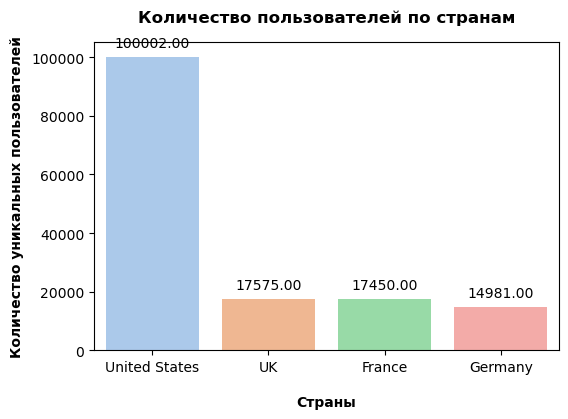

In [24]:
plot(
    region_analyse,
    parametre='region',
    name_x='Страны', 
    name_y='Количество уникальных пользователей', 
    name_plot='Количество пользователей по странам'
)

####  Выводы: Большинство пользователей приложения из USA - почти 62 тыс., в то время как в других странах количество пользователей не превышает 12 тыс.

#### Построим график по доле платящих пользователей:

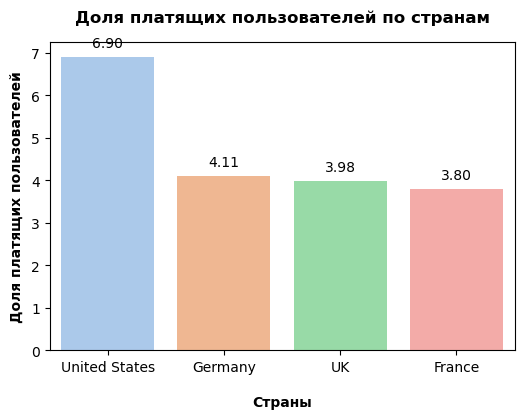

In [25]:
plot(
    region_analyse,
    parametre_y='part,%',
    parametre='region',
    name_x='Страны', 
    name_y='Доля платящих пользователей', 
    name_plot='Доля платящих пользователей по странам'
)

####  Выводы: Доля платящих пользователей так же выше в USA - 10%, в других странах значение около 5%.

####  Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Проанализируем данные в зависимости от устройства использования. Передадим параметр "устройство" и ознакомимся с результатом:

In [26]:
device_analyse=data_analyse_2('device')
device_analyse

device  unique_users  part,%
0  Android         35032    5.85
1      Mac         30042    6.36
2       PC         30455    5.05
3   iPhone         54479    6.21

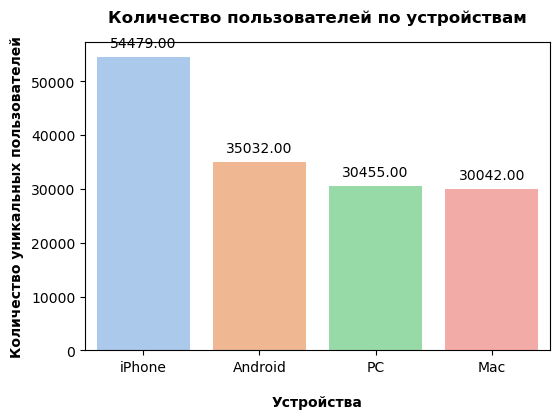

In [27]:
plot(
    device_analyse,
    parametre='device',
    name_x='Устройства', 
    name_y='Количество уникальных пользователей', 
    name_plot='Количество пользователей по устройствам'
)

#### Большинство пользователей приложения используют айфоны - около 34 тыс. чел., количество пользователей андроида, ПС и Мака варьируется от 18 до 22 тыс. чел.

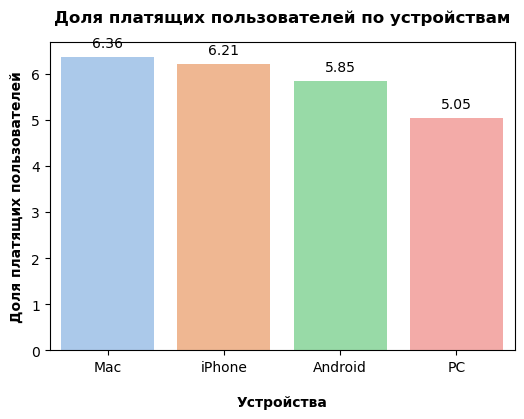

In [28]:
plot(
    device_analyse,
    parametre_y='part,%',
    parametre='device',
    name_x='Устройства', 
    name_y='Доля платящих пользователей', 
    name_plot='Доля платящих пользователей по устройствам'
)

#### Чуть больше платящих пользователей используют устройства от Apple - чуть больше 8% платящих среди владельцев. Владельцы андроида чуть больше 8%, PC - около 7%.

####  Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Проанализируем данные в зависимости от канала привлечения пользователей. Передадим параметр "канал" и ознакомимся с результатом:

Отсортируем по убыванию уникальных пользователей:

In [29]:
channel_analyse=data_analyse_2('channel')
channel_analyse.sort_values(by='unique_users', ascending=False)

channel  unique_users  part,%
10             organic         56439    2.06
1             FaceBoom         29144   12.20
6               TipTop         19561    9.60
4   OppleCreativeMedia          8605    2.71
2              LeapBob          8553    3.06
7       WahooNetBanner          8553    5.30
5       RocketSuperAds          4448    7.91
3         MediaTornado          4364    3.57
8              YRabbit          4312    3.83
0           AdNonSense          3880   11.34
9       lambdaMediaAds          2149   10.47

Отсортируем по убыванию доли платящих пользователей:

In [30]:
channel_analyse.sort_values(by='part,%', ascending=False)

channel  unique_users  part,%
1             FaceBoom         29144   12.20
0           AdNonSense          3880   11.34
9       lambdaMediaAds          2149   10.47
6               TipTop         19561    9.60
5       RocketSuperAds          4448    7.91
7       WahooNetBanner          8553    5.30
8              YRabbit          4312    3.83
3         MediaTornado          4364    3.57
2              LeapBob          8553    3.06
4   OppleCreativeMedia          8605    2.71
10             organic         56439    2.06

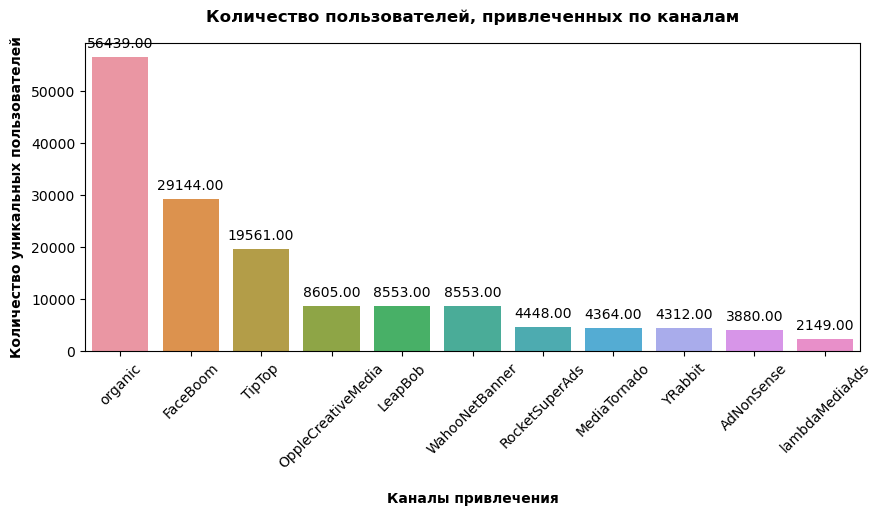

In [31]:
plot(
    channel_analyse,
    parametre='channel',
    name_x='Каналы привлечения', 
    name_y='Количество уникальных пользователей', 
    name_plot='Количество пользователей, привлеченных по каналам',
    figsize=(10,4),
    rotation=45
    
)

#### Выводы: Не учитывая "органических" пользователей, по количеству привлеченных лидируют FaceBoom (29 тыс.чел) и TipTop (19 тыс.чел). Меньше всех привлекает людей lambdaMediaAds (2 тыс.чел).

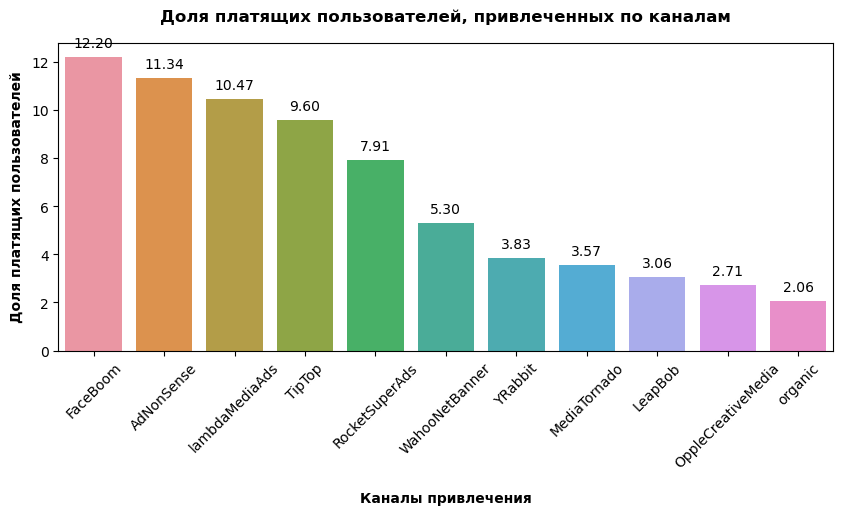

In [32]:
plot(
    channel_analyse.sort_values(by='part,%', ascending=False),
    parametre='channel',
    parametre_y='part,%',
    name_x='Каналы привлечения', 
    name_y='Доля платящих пользователей', 
    name_plot='Доля платящих пользователей, привлеченных по каналам',
    figsize=(10,4),
    rotation=45
    
)

#### Выводы: Меньше всего пллатящих пользователей среди "органических" (не сюрприз) - около 2%. По источникам меньше всего платящих приходит из OppleCreativeMedia- 3%. По доле платящих пользователей лидирует FaceBoom - 12.2%. Так же среди лидеров - lambdaMediaAds - 10%, что примечательно, ведь оттуда пришло меньше всего пользователей.

### Общий вывод:
Приложение популярно среди жителей США
- Большинство пользователей приложения из USA - почти 62 тыс., в то время как в других странах количество пользователей не превышает 12 тыс.
- Доля платящих пользователей так же выше в USA - 10%, в других странах значение около 5%.¶

Приложение популярно для пользователей техники Apple
- Большинство пользователей приложения используют айфоны - около 34 тыс. чел., количество пользователей андроида, ПС и Мака варьируется от 18 до 22 тыс. чел.¶
- Чуть больше платящих пользователей используют устройства от Apple - чуть больше 8% платящих среди владельцев. Владельцы андроида чуть больше 8%, PC - около 7%.¶

Больше всего пользователей пришли по рекламе FaceBoom и TipTop
- Не учитывая "органических" пользователей, по количеству привлеченных лидируют FaceBoom (29 тыс.чел) и TipTop (19 тыс.чел). Меньше всех привлекает людей lambdaMediaAds (2 тыс.чел).

Больше всего платящих пользователей пришло из FaceBoom
- Меньше всего пллатящих пользователей среди "органических" (не сюрприз) - около 2%. По источникам меньше всего платящих приходит из OppleCreativeMedia- 3%. По доле платящих пользователей лидирует FaceBoom - 12.2%. Так же среди лидеров - lambdaMediaAds - 10%, что примечательно, ведь оттуда пришло меньше всего пользователей.

### Маркетинг

In [33]:
costs['month']=pd.to_datetime(costs['dt']).dt.month 
costs['week']=pd.to_datetime(costs['dt']).dt.week 

#### Посчитаем общую сумму расходов на маркетинг.

In [34]:
round(costs['costs'].sum().astype(int),0)

105497

Всего на маркетинг было потрачено 105497.

#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник. Для этого сгруппируем данные по источникам и найдем сумму:

In [35]:
channel_costs=costs.groupby('channel').agg({'costs':'sum'}).reset_index().sort_values(by='costs', ascending=False)
channel_costs['part,%']=round(channel_costs['costs']/channel_costs['costs'].sum()*100,2)
channel_costs

channel     costs  part,%
6              TipTop  54751.30   51.90
1            FaceBoom  32445.60   30.75
7      WahooNetBanner   5151.00    4.88
0          AdNonSense   3911.25    3.71
4  OppleCreativeMedia   2151.25    2.04
5      RocketSuperAds   1833.00    1.74
2             LeapBob   1797.60    1.70
9      lambdaMediaAds   1557.60    1.48
3        MediaTornado    954.48    0.90
8             YRabbit    944.22    0.90

Визуализируем результат:

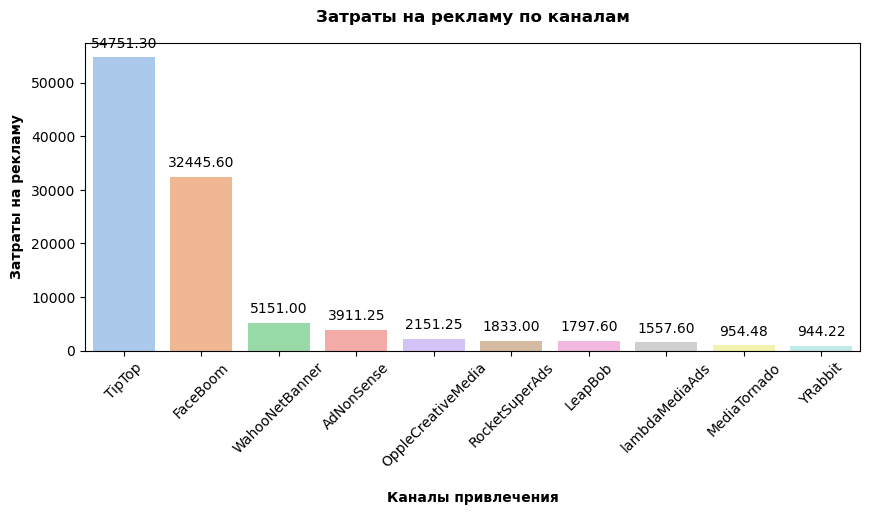

In [36]:
plot(
    channel_costs,
    parametre='channel',
    parametre_y='costs',
    name_x='Каналы привлечения', 
    name_y='Затраты на рекламу', 
    name_plot='Затраты на рекламу по каналам',
    figsize=(10,4),
    rotation=45
    
)

#### Затраты на рекламу в источниках TipTop (52%) и FaceBoom (31%) в несколько раз превышают затраты в других источниках (<5%). Стоит обратить на это внимание. Выясним как менялись затраты по месяцам:

In [37]:
channel_pivot_m=costs.pivot_table(index='month',columns='channel',values='costs',aggfunc='sum')

In [38]:
channel_pivot_m

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
month                                                                      
5           1169.70    3524.4   140.28        238.56              169.75   
6            538.65    5501.1   314.58        138.00              370.00   
7            504.00    5294.3   313.53        138.48              366.50   
8            579.60    6274.4   369.81        154.56              439.25   
9            581.70    6114.9   343.98        144.72              427.75   
10           537.60    5736.5   315.42        140.16              378.00   

channel  RocketSuperAds   TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
month                                                                      
5               577.980   2981.0           418.8   299.70           458.4  
6               325.715   6675.6           921.0   106.20           199.2  
7               252.070   8410.2           851.4    97.38           219.2  
8               253.110  11202.0          1040.4   124.74           220.0  
9               218.400  13232.5           977.4   152.79           247.2  
10              205.725  12250.0           942.0   163.41           213.6

Визуализируем результат:

<Figure size 1400x600 with 0 Axes>

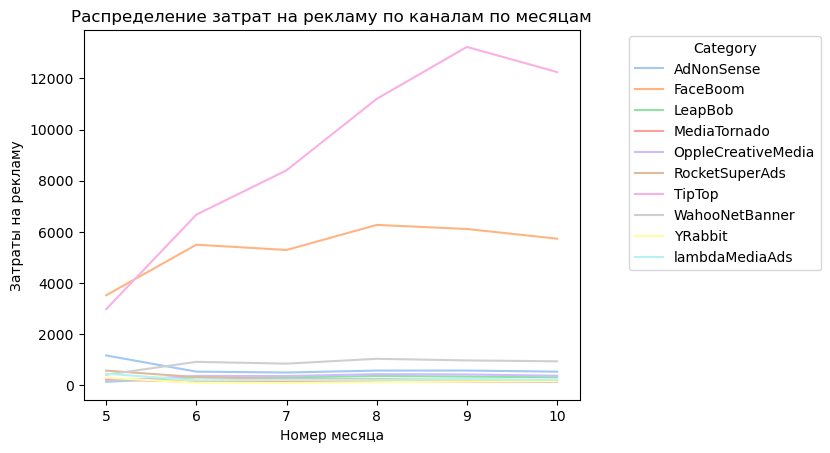

In [39]:
plt.figure(figsize=(14, 6))
channel_pivot_m.plot(kind='line')
plt.title('Распределение затрат на рекламу по каналам по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Затраты на рекламу')
plt.legend(title='Category', loc=(1.1,0.35))
plt.show()

In [40]:
channel_pivot_m['TipTop'].sort_values(ascending=False).head(1)

month
9    13232.5
Name: TipTop, dtype: float64

Самые большие расходы были на рекламный источник TipTop в сентябре.

#### Изучим затраты по неделям:

In [41]:
channel_pivot_w=costs.pivot_table(index='week',columns='channel',values='costs',aggfunc='sum')

In [42]:
channel_pivot_w.head()

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
week                                                                       
18           211.05     535.7    16.80         38.64               24.00   
19           273.00     750.2    31.71         61.68               34.50   
20           265.65     755.7    26.67         59.04               27.50   
21           266.70     722.7    26.67         50.16               34.25   
22           202.65    1208.9    65.52         36.96               81.75   

channel  RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
week                                                                      
18               99.450   347.0            49.2     52.2            81.6  
19              139.230   470.0            92.4     75.9           103.2  
20              138.060   454.0            90.0     69.3            90.4  
21              131.040   801.8            79.2     65.4           119.2  
22               97.695  1421.2           179.4     49.8            83.2

Визуализируем результат:

<Figure size 1400x600 with 0 Axes>

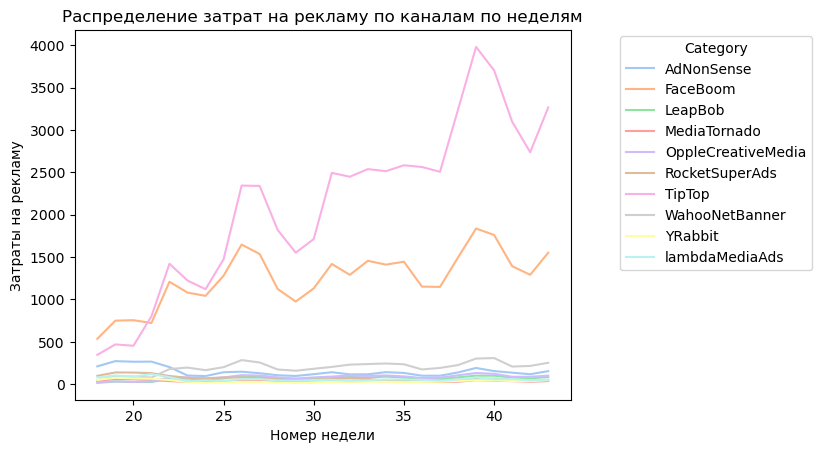

In [43]:
plt.figure(figsize=(14, 6))
channel_pivot_w.plot(kind='line')
plt.title('Распределение затрат на рекламу по каналам по неделям')
plt.xlabel('Номер недели')
plt.ylabel('Затраты на рекламу')
plt.legend(title='Category', loc=(1.1,0.35))
plt.show()

In [44]:
channel_pivot_w['TipTop'].sort_values(ascending=False).head(1)

week
39    3979.5
Name: TipTop, dtype: float64

Самые большие расходы были на рекламный источник TipTop на 39 неделе.

#### В то время как в остальных источниках затраты на рекламу имеют постоянную величину, в источниках TipTop и FaceBoom затраты растут. Эффективны ли затраты проверим ниже:

#### Выясним, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, используя профили пользователей:

In [45]:
CAC_channel=profiles.groupby('channel').agg({'acquisition_cost':'mean'}).reset_index()
CAC_channel=CAC_channel.sort_values(by='acquisition_cost', ascending=False)
CAC_channel.columns=['channel','avg_cost_user']
CAC_channel

channel  avg_cost_user
6               TipTop       2.799003
1             FaceBoom       1.113286
0           AdNonSense       1.008054
9       lambdaMediaAds       0.724802
7       WahooNetBanner       0.602245
5       RocketSuperAds       0.412095
4   OppleCreativeMedia       0.250000
8              YRabbit       0.218975
3         MediaTornado       0.218717
2              LeapBob       0.210172
10             organic       0.000000

Визуализируем данные:

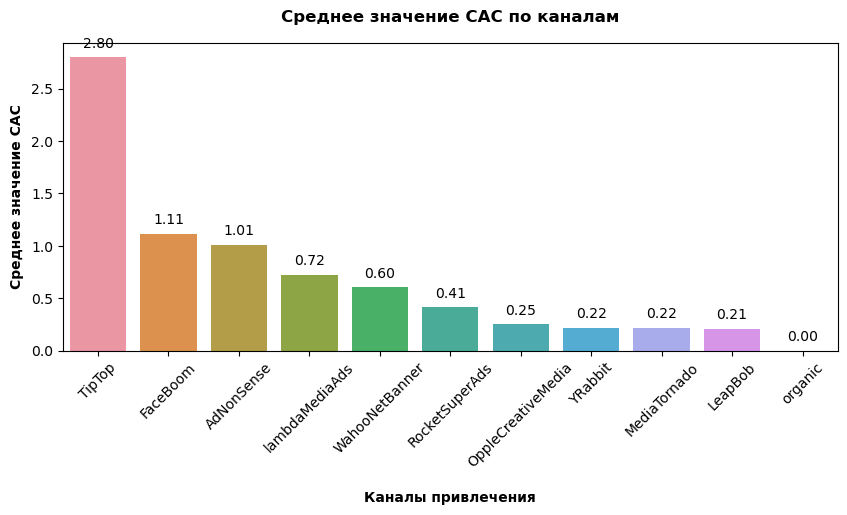

In [46]:
plot(
    CAC_channel,
    parametre='channel',
    parametre_y='avg_cost_user',
    name_x='Каналы привлечения', 
    name_y='Среднее значение CAC', 
    name_plot='Среднее значение CAC по каналам',
    figsize=(10,4),
    rotation=45
    
)

#### Вывод: Самые "дорогие" пользователи приходят из TipTop. Пользователи из FaceBoom и AdNonSense стоят вдвое дешевле.

 ### Общий вывод:
 Возможно, изменилась стоимость рекламы:
 - Затраты на рекламу в источниках TipTop (52%) и FaceBoom (31%) в несколько раз превышают затраты в других источниках (<5%). Стоит обратить на это внимание.
 - В то время как в остальных источниках затраты на рекламу имеют постоянную величину, в источниках TipTop и FaceBoom затраты растут. Необходимо проверить эффективно ли это.
 - Самые "дорогие" пользователи приходят из TipTop. Пользователи из FaceBoom и AdNonSense стоят вдвое дешевле.
 - Самые большие расходы были на рекламный источник TipTop на 39 неделе.
 - Самые большие расходы были на рекламный источник TipTop в сентябре.

### Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

#### Для начала исключим "органических" пользователей из данных, они их искажают:

In [47]:
profiles=profiles.loc[profiles['channel']!='organic']

#### Установим момент анализа и горизонт:

In [48]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

#### Проанализируeм окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI:

In [49]:
result_raw,ltv,ltv_history,roi,roi_history = get_ltv(profiles,orders,observation_date,horizon_days,dimensions=[],ignore_horizon=False)

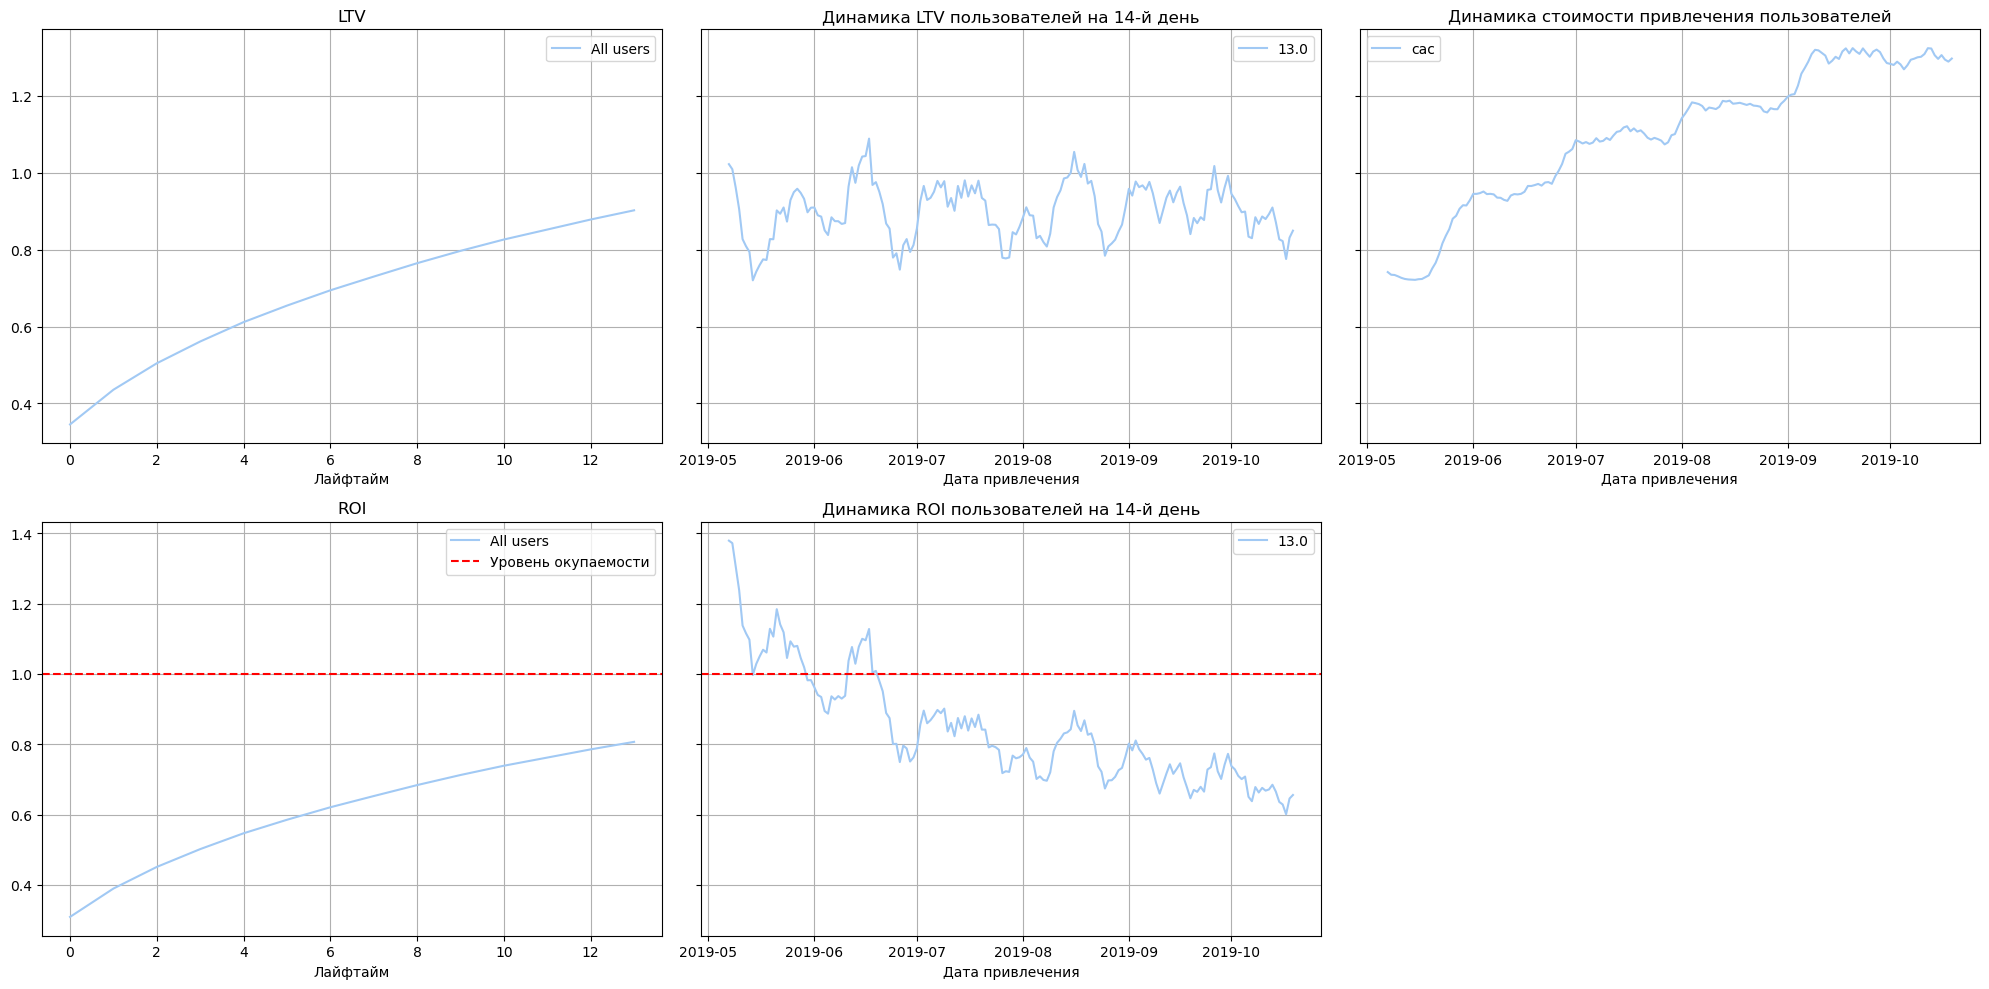

In [50]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

#### Выводы:
- Реклама не окупается. ROI в конце периода в 14 дней — 80%. По общей динамике окупаемость исчезла в июне.
- CAC растет начиная с середины мая. Значит, дело в затратах на рекламу. Окупается САС только в мае-июне, а позже не окупается. Видимо, из-за увеличения затрат на рекламу в TipTop и FaceBoom.
- Динамика LTV достаточно стабильна в определенных пределах. Значит, дело не в ухудшении качества пользователей.
- Изучим конверсию и удержание, а дальше будем разбираться в каких параметрах дело.

#### Визуализируем конверсию:

In [51]:
result_raw, conversion, conversion_history=get_conversion(profiles, orders, observation_date, horizon_days, dimensions=[],ignore_horizon=False)

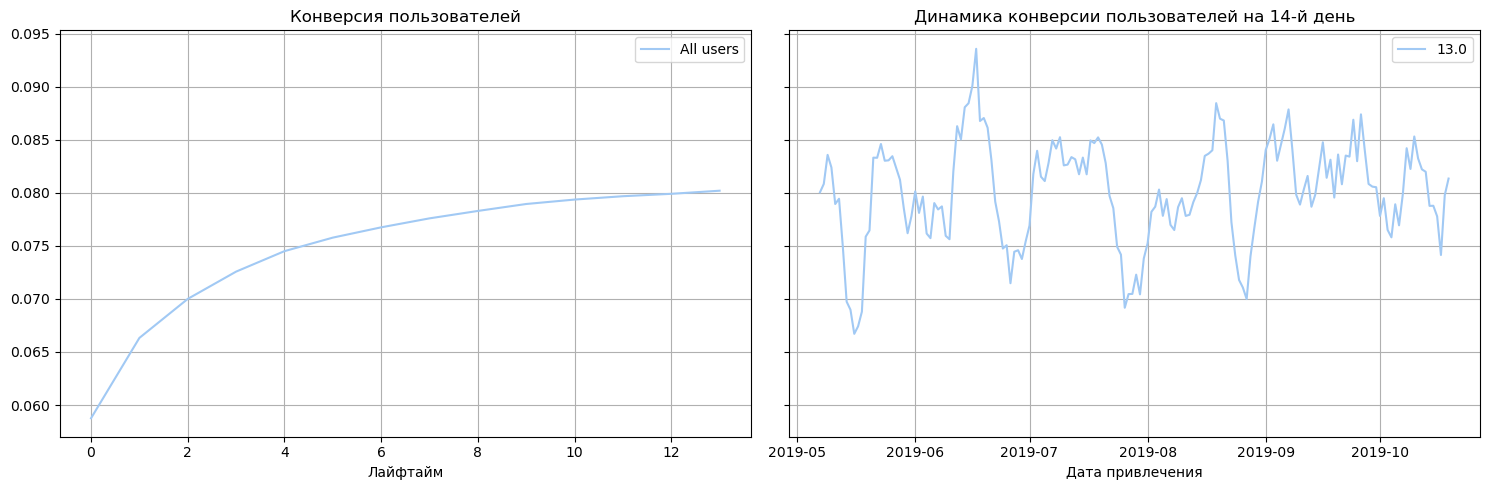

In [52]:
plot_conversion(conversion, conversion_history, 14, window=7)

#### Вывод: Общая конверсия пользователей достаточно стабильна. Динамика наблюдается в заданном корридоре.

Взглянем на удержание пользователей:

In [53]:
result_raw, retention, retention_history=get_retention(profiles, visits, observation_date, horizon_days, dimensions=[], ignore_horizon=False)

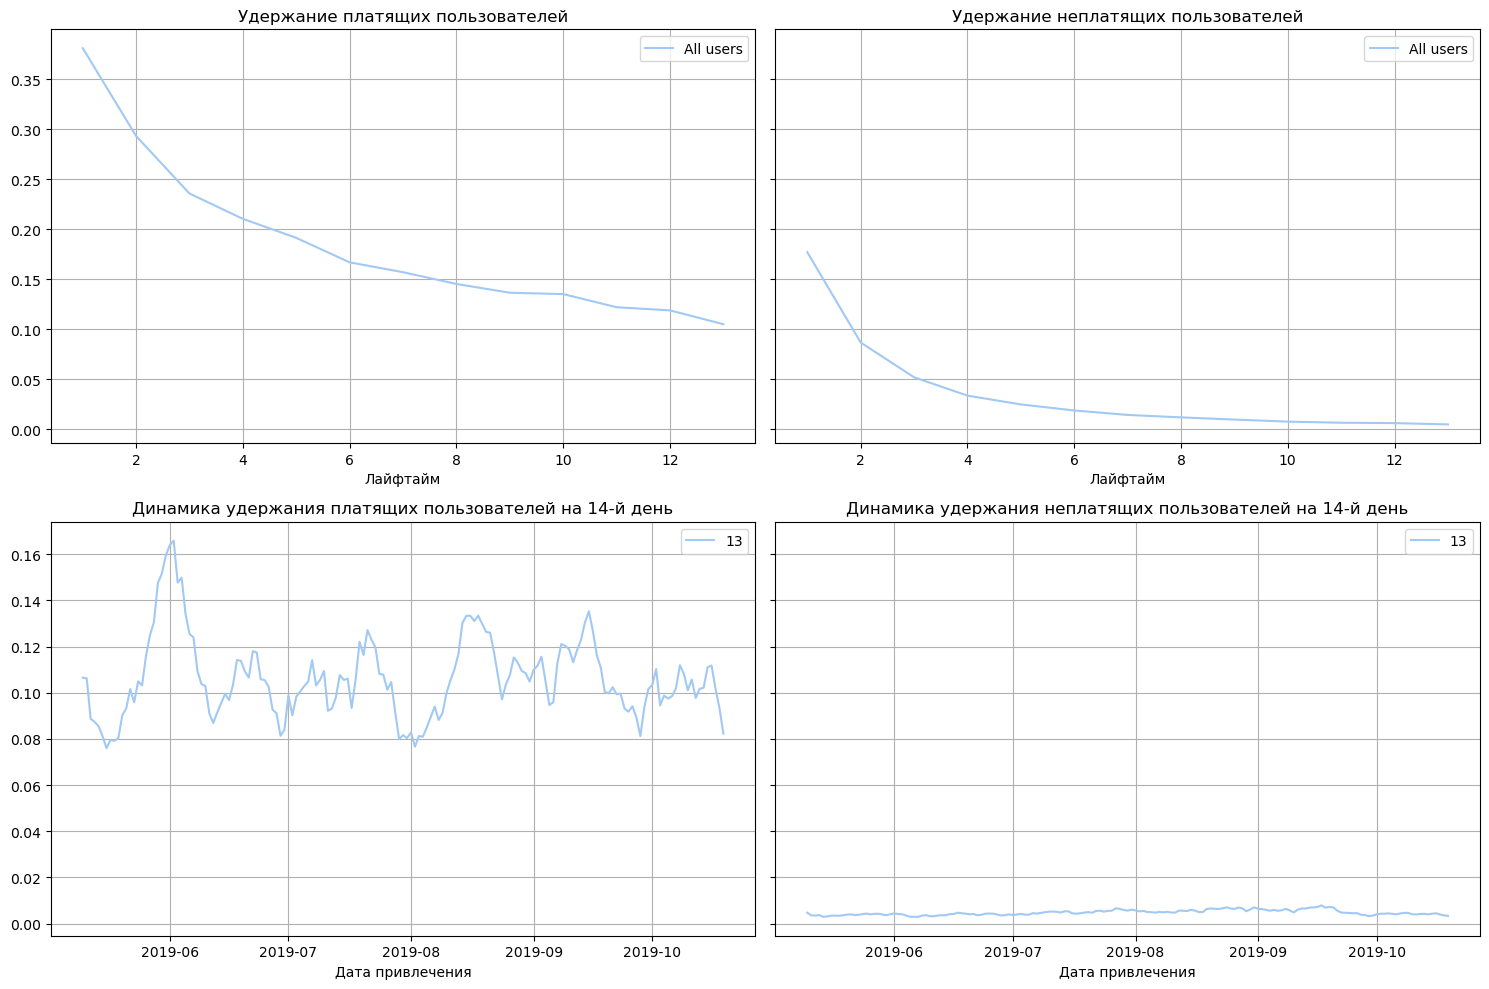

In [54]:
plot_retention(retention, retention_history, horizon_days, window=10)

#### Все по законам жанра. Удержание платящих меньше удержания неплатящих. В июне - динамика удержания платящих пользователей резко возрастает, а дальше стабилизируется в заданном диапазоне. Вероятно - сезонная история.

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [55]:
result_raw,ltv,ltv_history,roi,roi_history = get_ltv(profiles,orders,observation_date,horizon_days,dimensions=['region'],ignore_horizon=False)

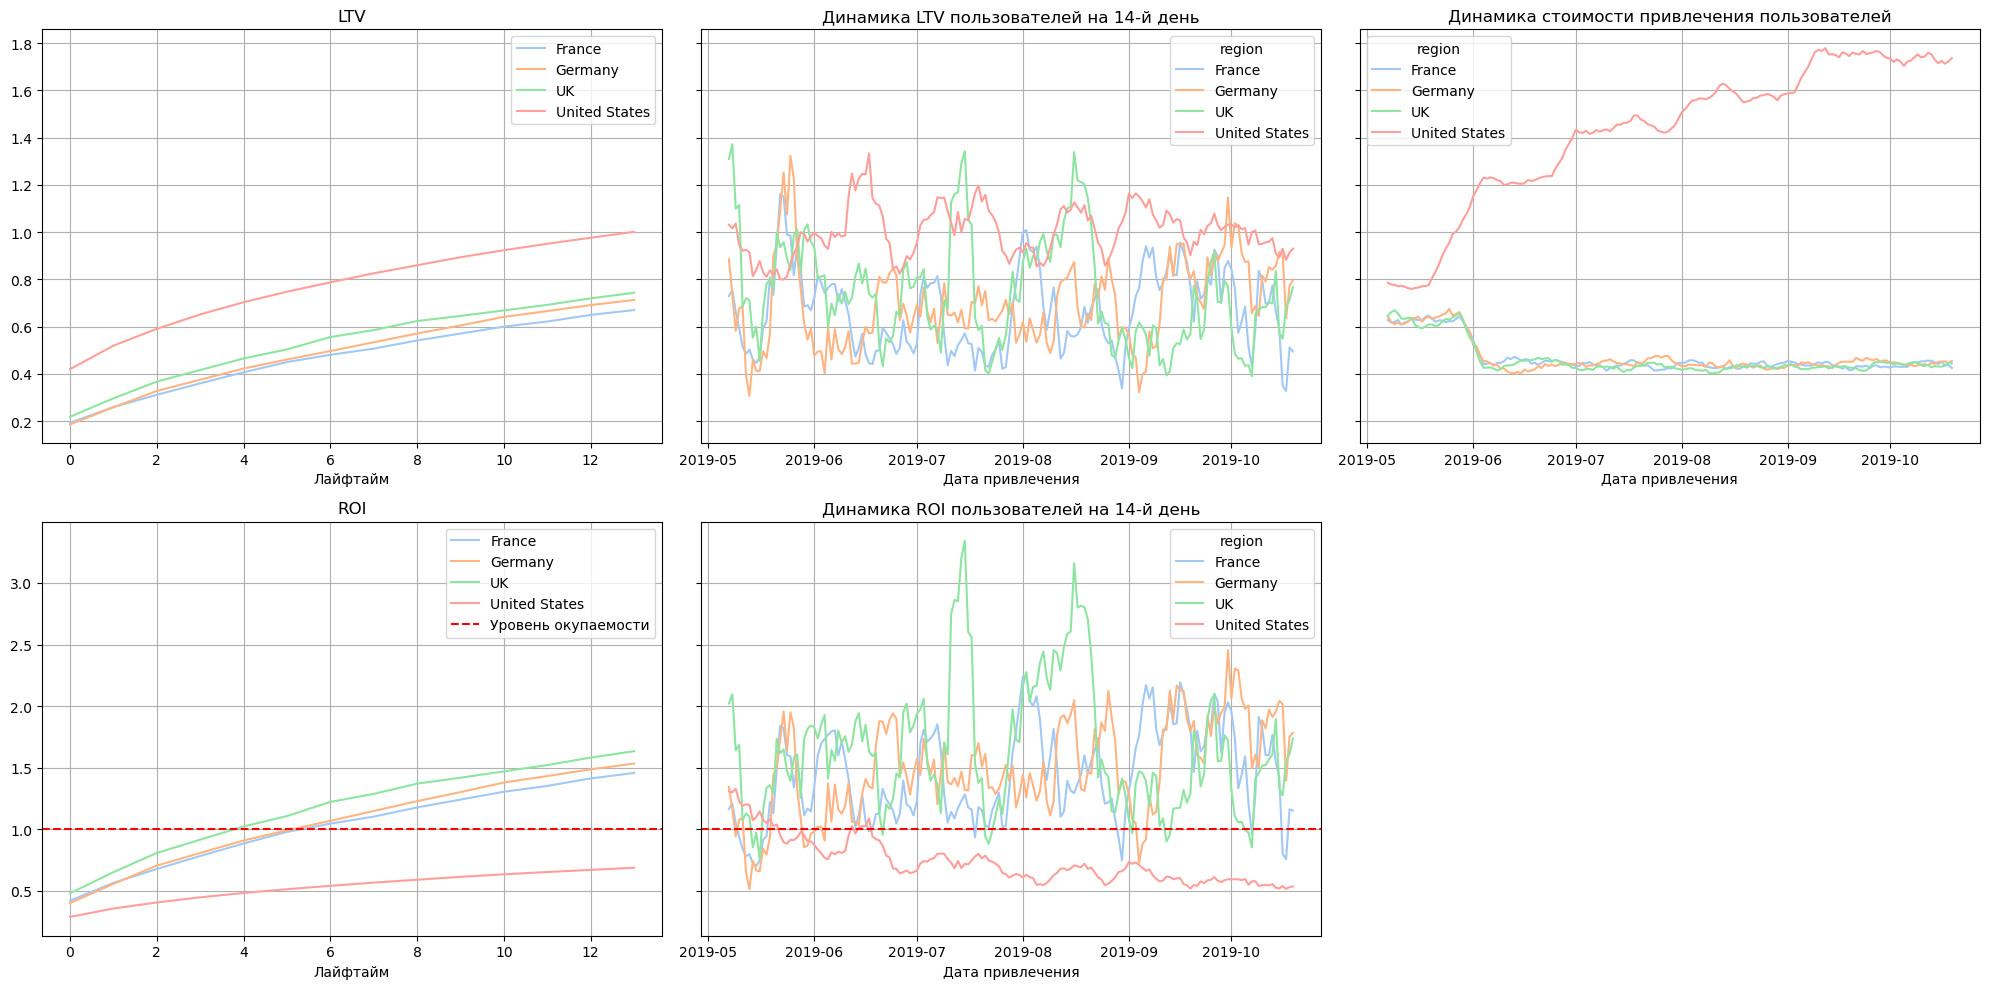

In [56]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

#### Выводы: 
- Реклама не окупается в США.
- Стоимость привлечения для США с середины мая начинает резко расти, для других стран чуть падает и стабилизируется.
- LTV достаточно стабилен.
- LTV у пользователей из США выше. Однако реклама в США не окупается, возможно, это связано с неэффективным увеличением затрат на рекламу в некоторых источниках.
- Всплески ROI в UK на 14й день могут быть связаны с какими-то локальными событиями в UK.

#### Взглянем на конверсию в зависимости от стран:

In [57]:
result_raw, conversion, conversion_history=get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['region'],ignore_horizon=False)

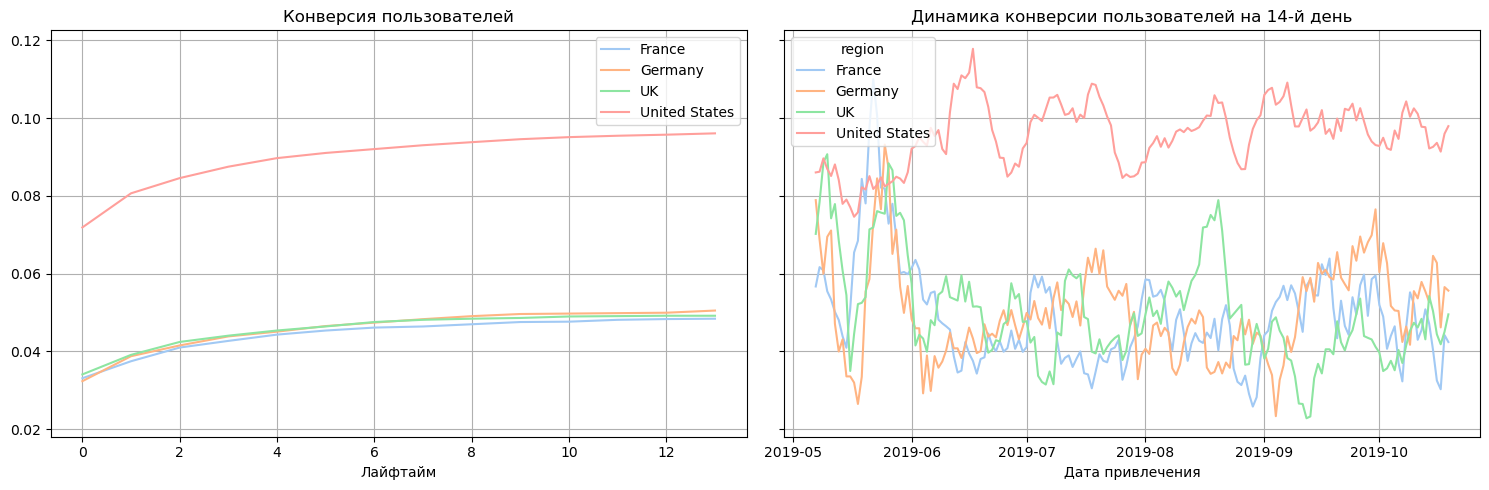

In [58]:
plot_conversion(conversion, conversion_history, 14, window=7)

#### По графикам видно, что конверсия пользователей в США намного больше, чем в других странах. Значит дело в источниках рекламы, а не в самой стране США. Также наблюдается всплеск динамики конверсии в конце мая в европейских странах, а в США чуть проседает. Возможно, была рекламная компания.

#### Посмотрим на график удержания пользователей по странам:

In [59]:
result_raw, retention, retention_history=get_retention(profiles, visits, observation_date, horizon_days, dimensions=['region'], ignore_horizon=False)

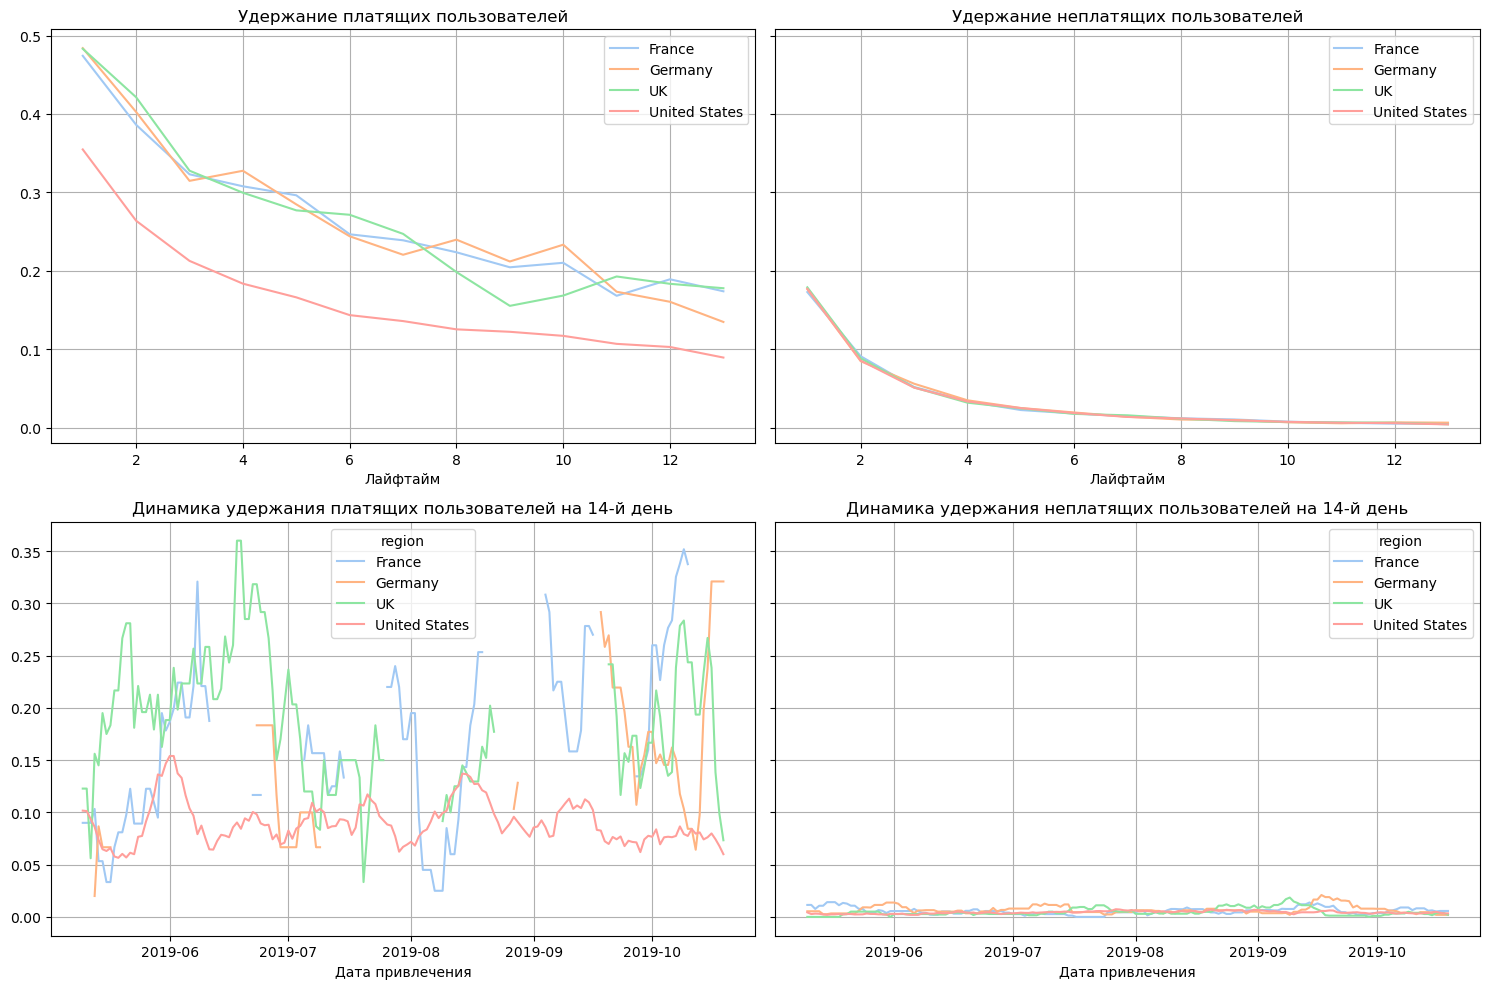

In [60]:
plot_retention(retention, retention_history, horizon_days, window=10)

#### А вот с удержанием в США дела обстоят хуже процентов на 10, чем в других странах. Возможно, связано с техническими проблемами с совместимостью с Apple. В других странах все вполне стабильно.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI:

In [61]:
result_raw,ltv,ltv_history,roi,roi_history = get_ltv(profiles,orders,observation_date,horizon_days,dimensions=['device'],ignore_horizon=False)

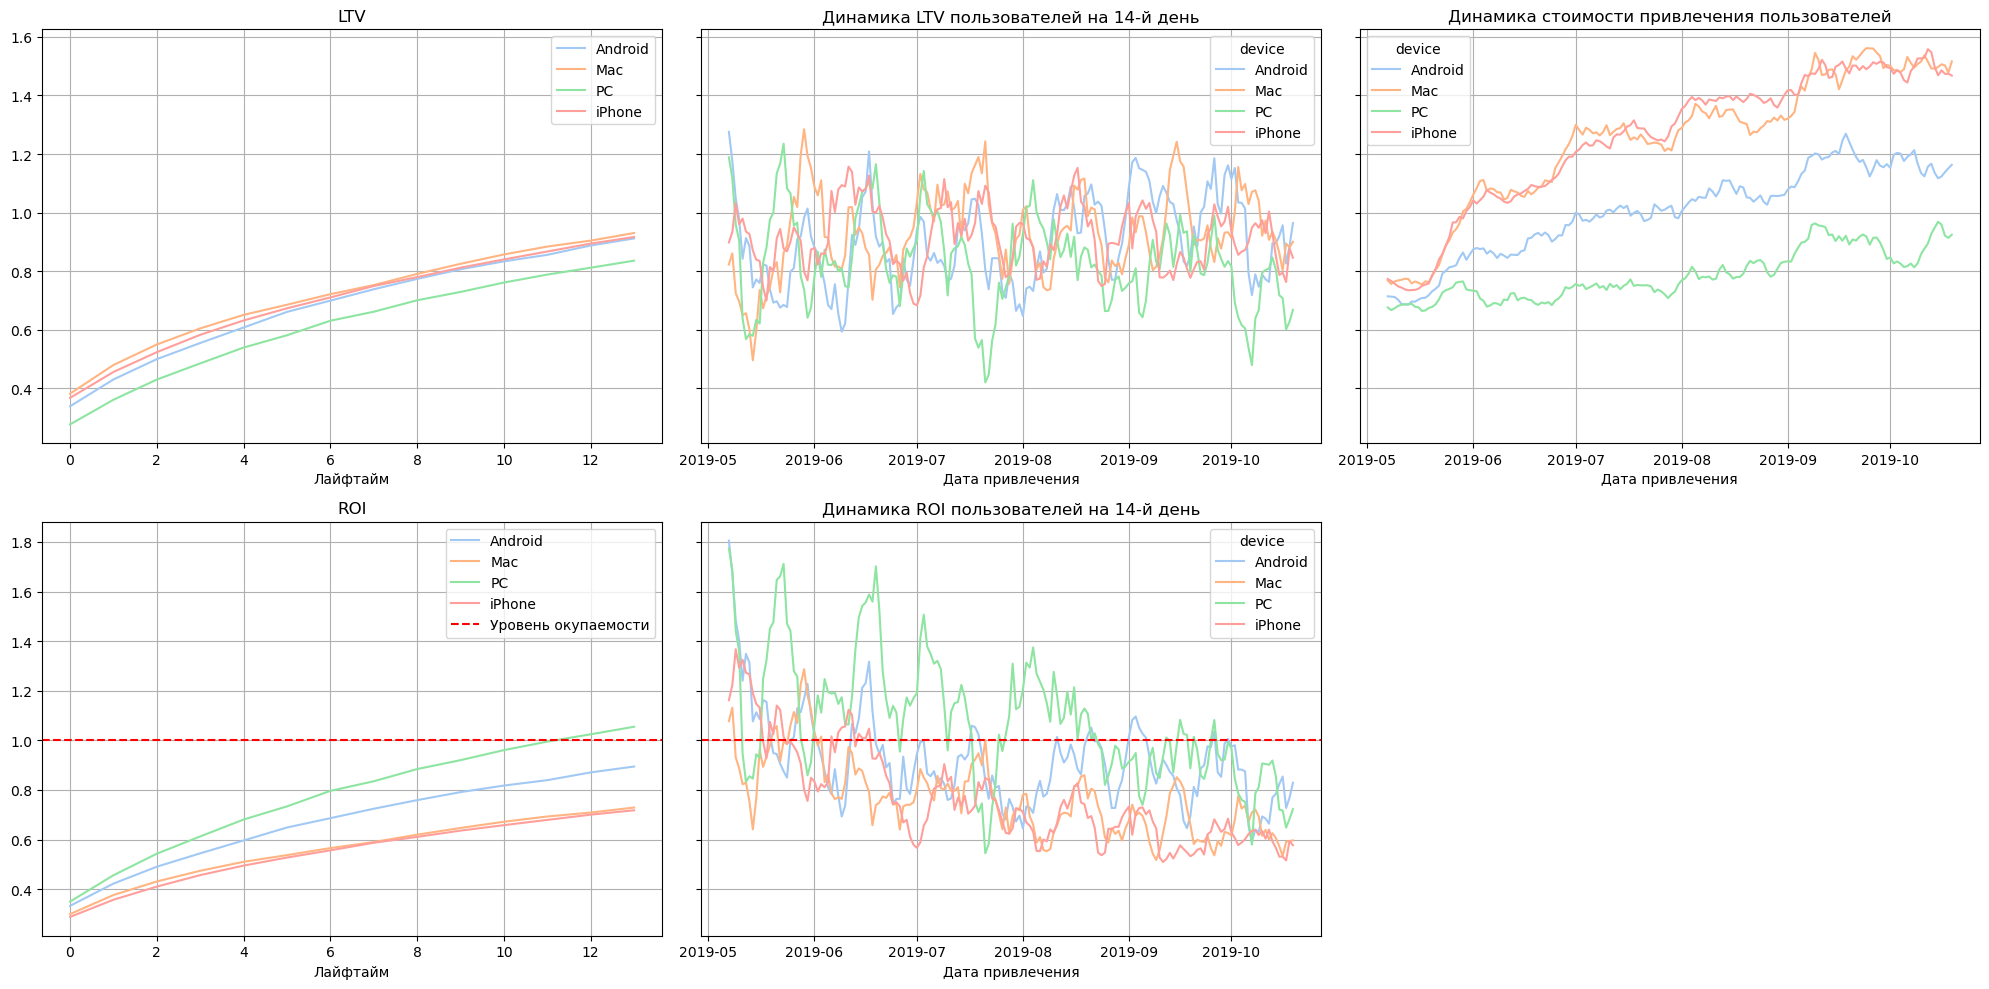

In [62]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

#### По лайфтайму все стабильно, у ПК он чуть ниже, это может значить, что ПК это менее мобильное устройство. Динамика  LTV на 14 день стабильна в своих пределах, наблюдаются небольшие провалы у ПК в середине июля. На технике apple CAC выше всего, возможно связано с тем, что самые дорогие пользователи из США. Самые "дешевые" пользователи - владельцы ПК. По всем устройствам стабильно - стоимость привлечения стабильно растет, связано это с США. Окупаемость практически отсутствует. Лишь на 12 день лайфтайма окупаются пользователи, использующие ПК. Чуть недотягивают пользователи на андроидах, а владельцы техники от apple окупаются хуже всего. Динамика ROI на 14 день примечательная тем, что в лидерах находится ПК, пользователи окупаются быстрее всех, ведь они самые "дешевые".

Взглянем на конверсию и удержание:

In [63]:
result_raw, conversion, conversion_history=get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['device'],ignore_horizon=False)

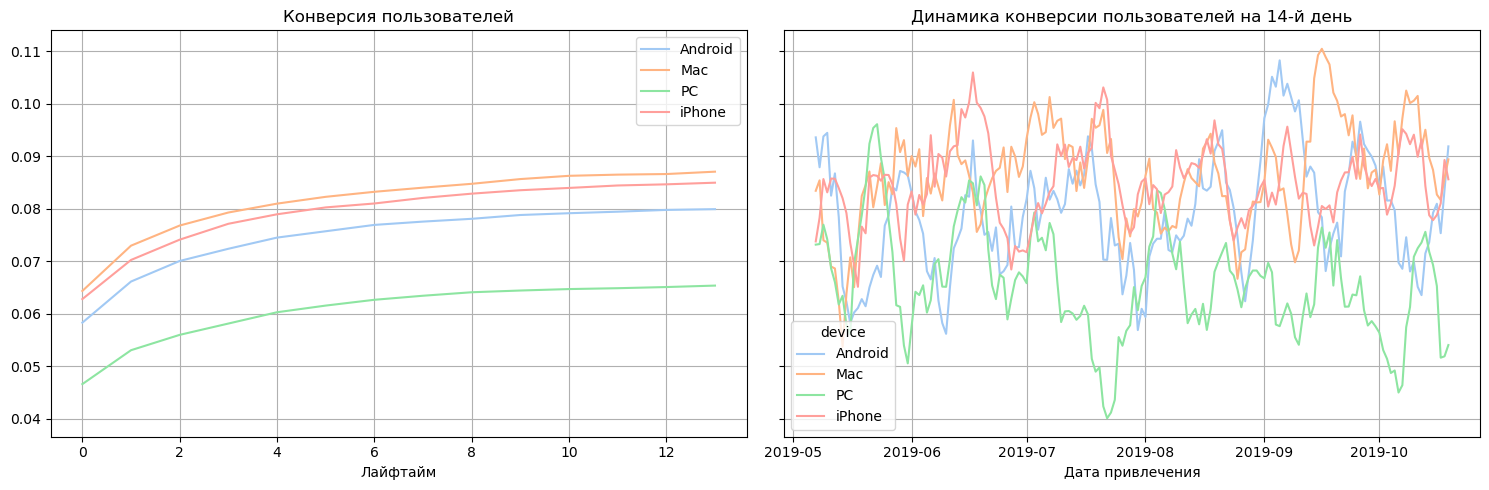

In [64]:
plot_conversion(conversion, conversion_history, 14, window=7)

#### Конверсия пользователей ПК самая низкая, скорее всего это связано с тем, что с телефона или с техники apple платить гораздо проще.  В остальном примерно стабильно.

In [65]:
result_raw, retention, retention_history=get_retention(profiles, visits, observation_date, horizon_days, dimensions=['device'], ignore_horizon=False)

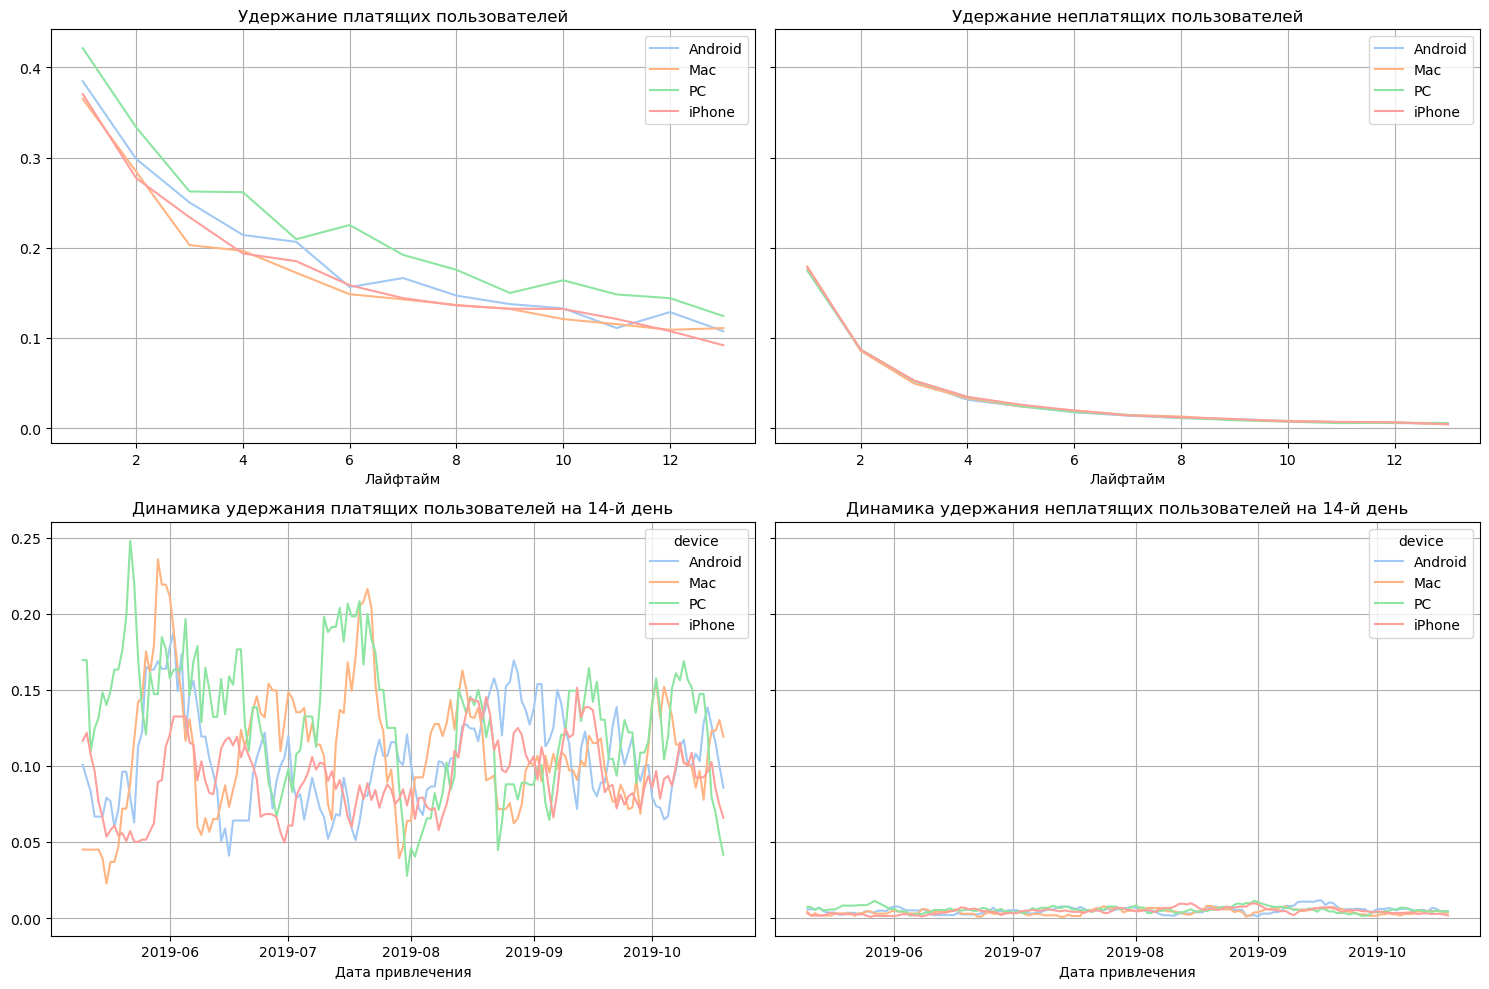

In [66]:
plot_retention(retention, retention_history, horizon_days, window=10)

#### Особых отклонений по удержанию в зависимости от устройств - нет.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI:

In [67]:
result_raw,ltv,ltv_history,roi,roi_history = get_ltv(profiles,orders,observation_date,horizon_days,dimensions=['channel'],ignore_horizon=False)

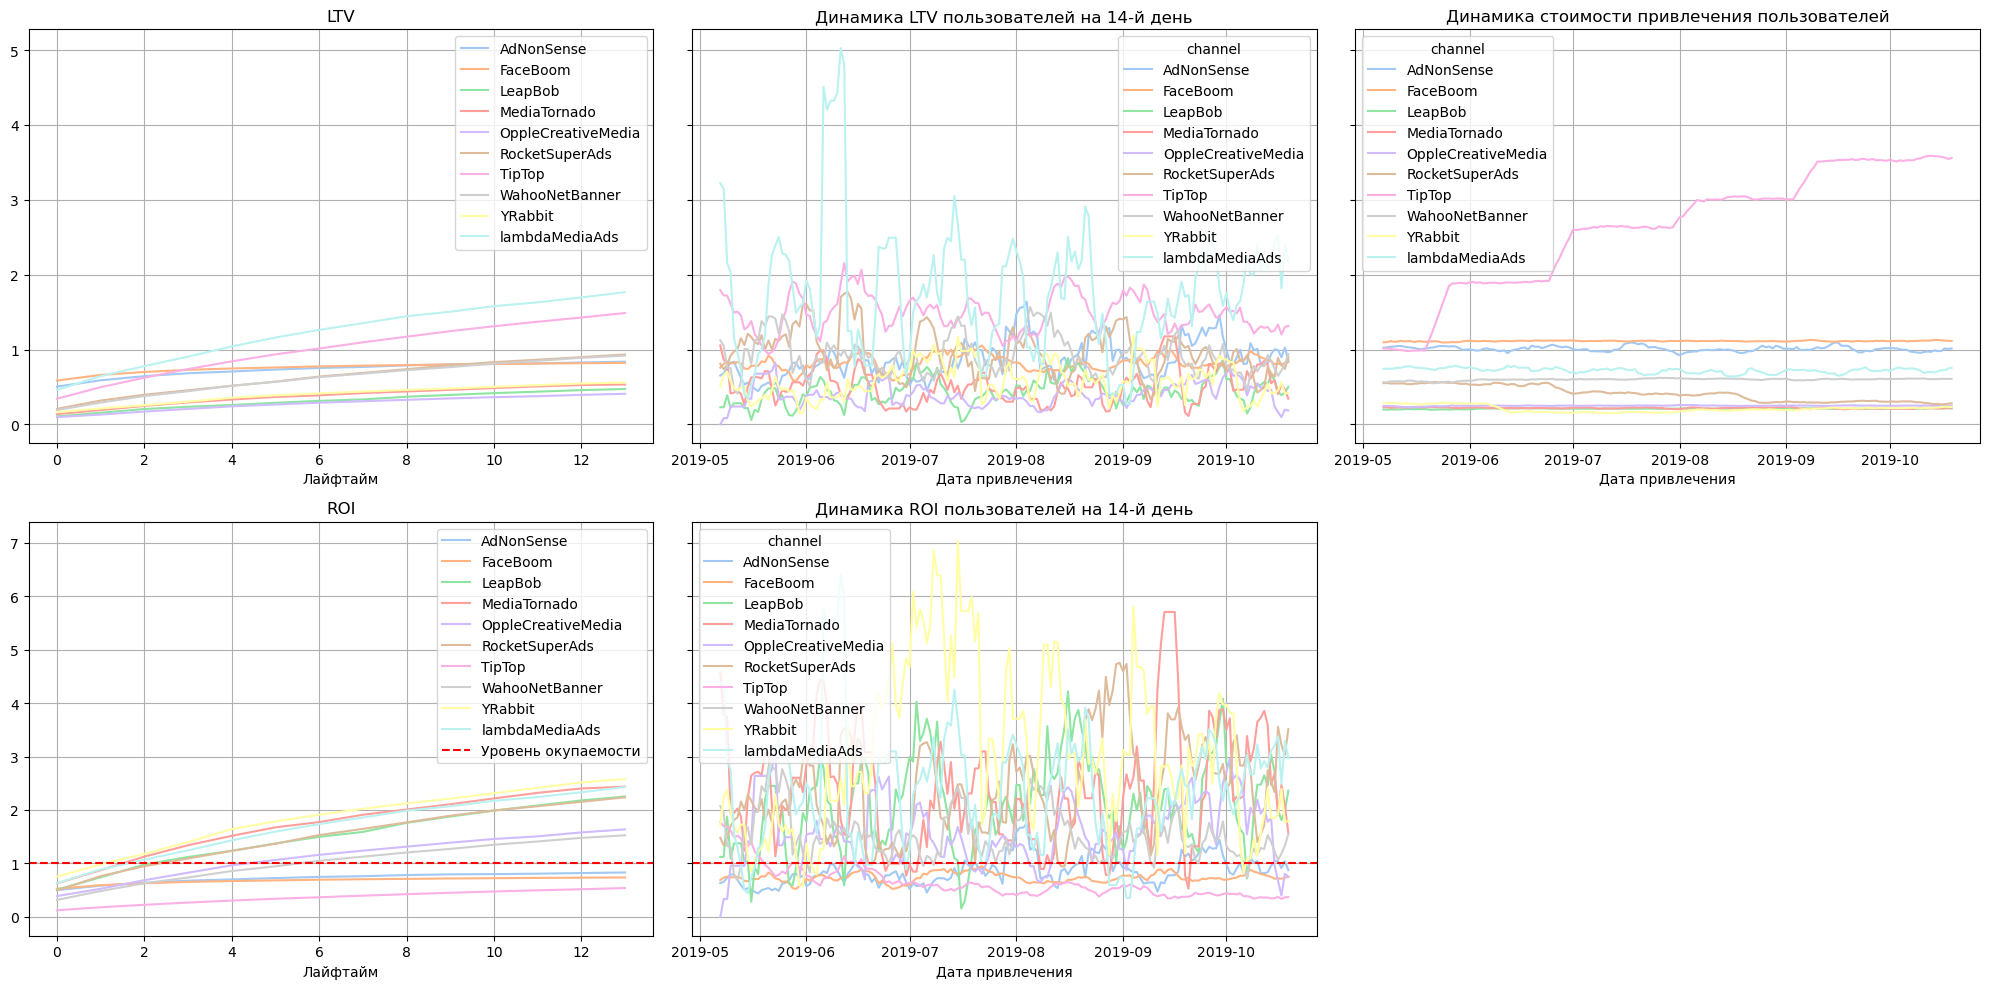

In [68]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Выводы: 
- У пользователей lambdamediaAds лучшая динамика LTV. 
- Лучшая динамика окупаемости у YRabbit.
- С июля по август наблюдаются всплески ROI на 14й день у YRabbit. Перспективный канал для США.
- Все пользователи окупаются, кроме пользователей, пришедших по AdNonSense, FaceBoom и TipTop.
- CAC у всех источников стабильно, кроме TipTop. У TipTop CAC растет с середны мая стабильно на протяжении всего пероиода.

#### Взглянем на конверсию и удержание:

In [69]:
result_raw, conversion, conversion_history=get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['channel'],ignore_horizon=False)

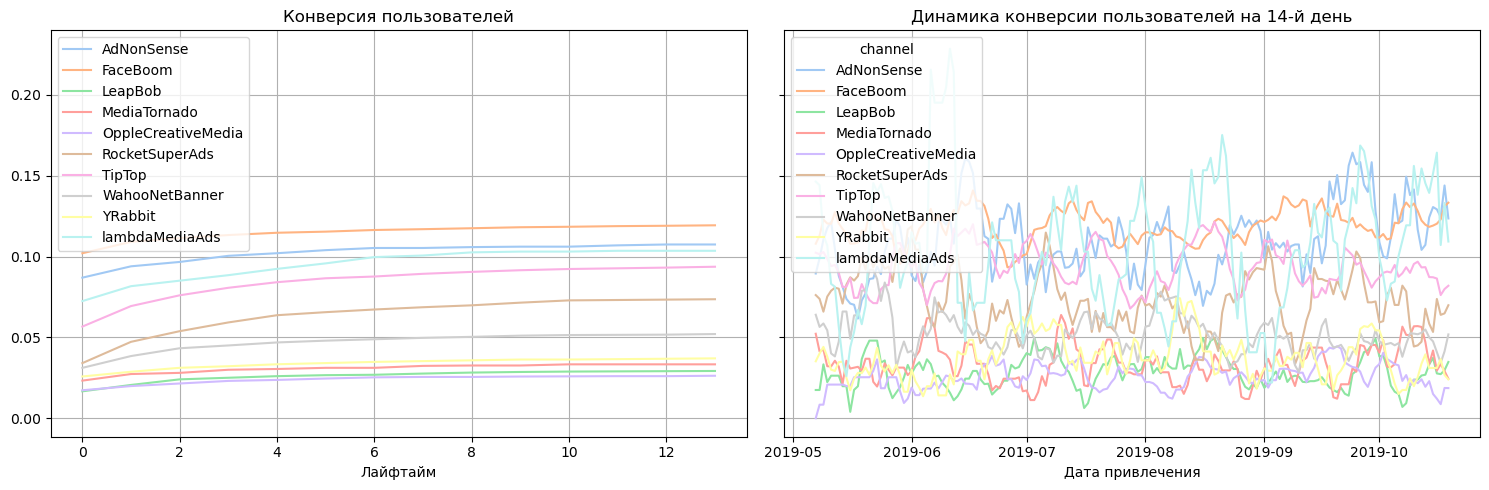

In [70]:
plot_conversion(conversion, conversion_history, 14, window=7)

In [71]:
result_raw, retention, retention_history=get_retention(profiles, visits, observation_date, horizon_days, dimensions=['channel'], ignore_horizon=False)

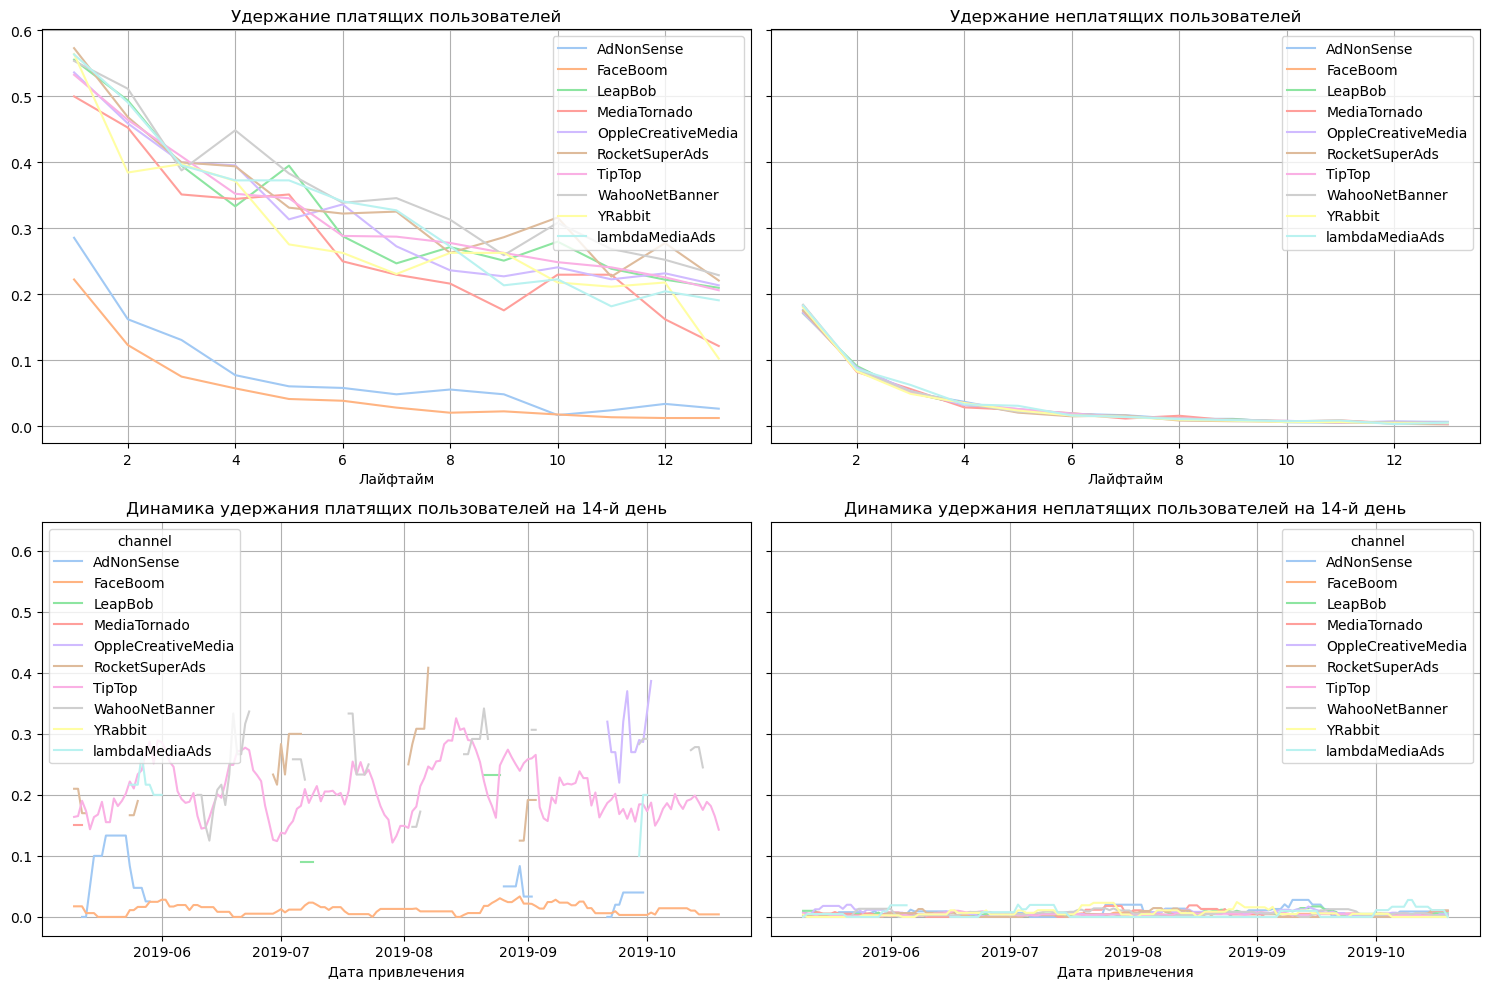

In [72]:
plot_retention(retention, retention_history, horizon_days, window=10)

#### Конверсия по устройствам распределена равномерно от 2 до 12 %. В лидерах по конверсии - FaceBoom. Меньше всего конвертируются пользователи из OppleCreativeMedia, LeapBob, MediaTomado и YRabbit (менее 5%). Динамика конверсии 14й денб стабильна, но наблюдатся всплеск у AdNonSense в начале июня. У пользователей от AdNonSense и FaceBoom очень низкое удержание - примерно на 30% меньше, чем у остальных. 

#### Проверим в каких странах какие источники рекламы используются:

In [73]:
pivot_region=profiles\
.pivot_table(
    index='channel', 
    columns='region', 
    values='user_id', 
    aggfunc='sum',
    fill_value=0
)
pivot_region.sort_values(by='United States')

region                        France           Germany                UK  \
channel                                                                    
AdNonSense           702798060832124   616132888976271   640549239967849   
LeapBob             1484433705869574  1264658745455852  1539904380492977   
OppleCreativeMedia  1499068948914854  1289478005442312  1501563683171425   
WahooNetBanner      1477713898149230  1272148862814362  1505800555069881   
lambdaMediaAds       365282995365995   314139073655057   358035727338614   
YRabbit                            0                 0                 0   
MediaTornado                       0                 0                 0   
RocketSuperAds                     0                 0                 0   
TipTop                             0                 0                 0   
FaceBoom                           0                 0                 0   

region                  United States  
channel                                
AdNonSense                          0  
LeapBob                             0  
OppleCreativeMedia                  0  
WahooNetBanner                      0  
lambdaMediaAds                      0  
YRabbit              2143810696485552  
MediaTornado         2217083852497856  
RocketSuperAds       2231345012998483  
TipTop               9708289783241706  
FaceBoom            14606558389460600

#### Так как в США наблюдаются проблемы с окупаемостью - проанализируем окупаемость рекламы с разбивкой по рекламным каналам для США. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI:

In [74]:
result_raw,ltv,ltv_history,roi,roi_history = get_ltv(profiles[profiles['channel'].isin(['TipTop','YRabbit','MediaTornado','RocketSuperAds','FaceBoom'])],orders,observation_date,horizon_days,dimensions=['channel'],ignore_horizon=False)

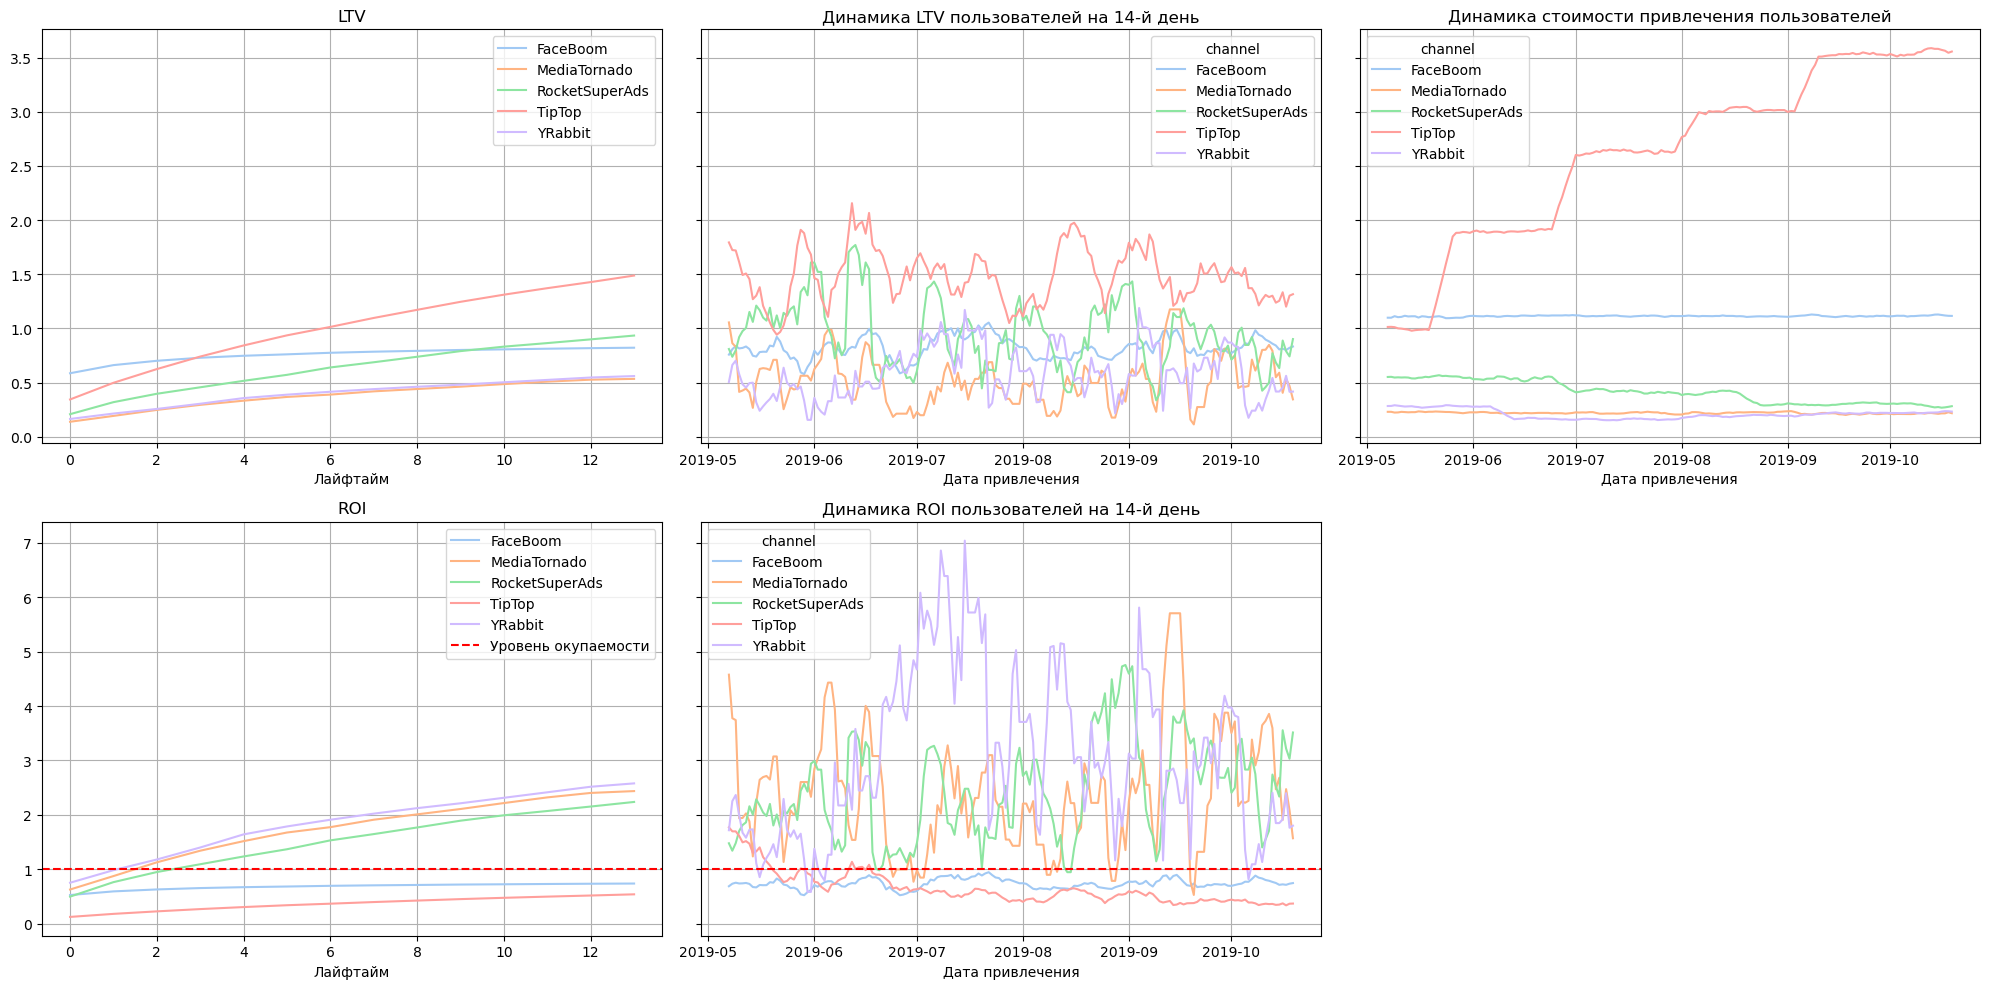

In [75]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Выводы: 
- Проблемные источники FaceBoom и TipTop. Они не окупаются. При этом:
    - У TipTop CAC стабильно растет
    - У FaceBoom CAC стабильный
- Перспективные - YRabbit, MediaTornado	и RocketSuperAds, при этом:
    - LTV выше у RocketSuperAds
    - ROI выше у YRabbit (из-за низкой цены на рекламу). 
    - CAC у YRabbit чуть выше, чем у MediaTornado и RocketSuperAds

In [76]:
profiles[profiles['channel'].isin(['TipTop','YRabbit','MediaTornado','RocketSuperAds','FaceBoom'])]

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
8           58263264 2019-05-11 19:18:43      FaceBoom  iPhone  United States   
9           59835779 2019-05-11 21:13:47  MediaTornado  iPhone  United States   
...              ...                 ...           ...     ...            ...   
149999  999942424543 2019-05-24 21:03:26        TipTop  iPhone  United States   
150001  999949280903 2019-08-12 06:47:27      FaceBoom     Mac  United States   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   

                dt               month  payer  acquisition_cost  
0       2019-05-07 2019-05-07 20:58:57   True          1.088172  
1       2019-07-09 2019-07-09 12:46:07  False          1.107237  
4       2019-10-02 2019-10-02 00:07:44  False          0.230769  
8       2019-05-11 2019-05-11 19:18:43  False          1.128205  
9       2019-05-11 2019-05-11 21:13:47  False          0.250435  
...            ...                 ...    ...               ...  
149999  2019-05-24 2019-05-24 21:03:26  False          1.900000  
150001  2019-08-12 2019-08-12 06:47:27  False          1.117838  
150003  2019-09-28 2019-09-28 08:33:02  False          3.500000  
150005  2019-07-23 2019-07-23 02:57:06  False          2.600000  
150006  2019-09-28 2019-09-28 21:28:09  False          0.205714  

[61829 rows x 9 columns]

In [77]:
result_raw, conversion, conversion_history=get_conversion(profiles[profiles['channel'].isin(['TipTop','YRabbit','MediaTornado','RocketSuperAds','FaceBoom'])], orders, observation_date, horizon_days, dimensions=['channel'],ignore_horizon=False)

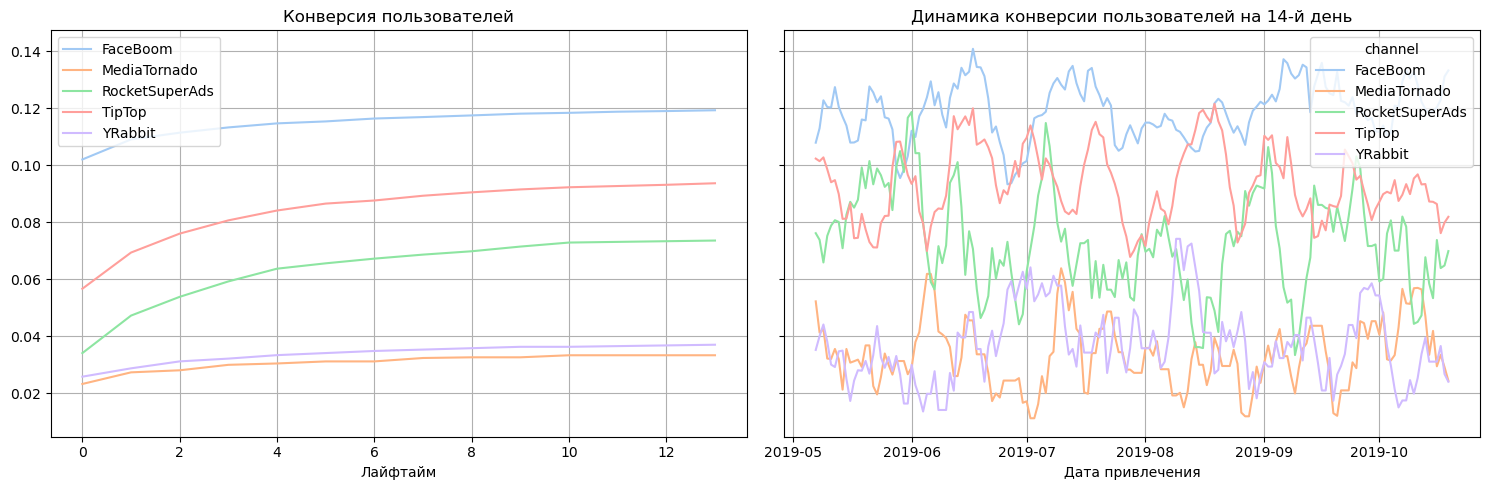

In [78]:
plot_conversion(conversion, conversion_history, 14, window=7)

Выводы: 
- По конверсии лидируют FaceBoom и TipTop, но они убыточны
- По окупаемым источникам максимальная конверсия у RocketSuperAds, YRabbit и MediaTornado ниже примерно на 15%

In [79]:
result_raw, retention, retention_history=get_retention(profiles[profiles['channel'].isin(['TipTop','YRabbit','MediaTornado','RocketSuperAds','FaceBoom'])], visits, observation_date, horizon_days, dimensions=['channel'], ignore_horizon=False)

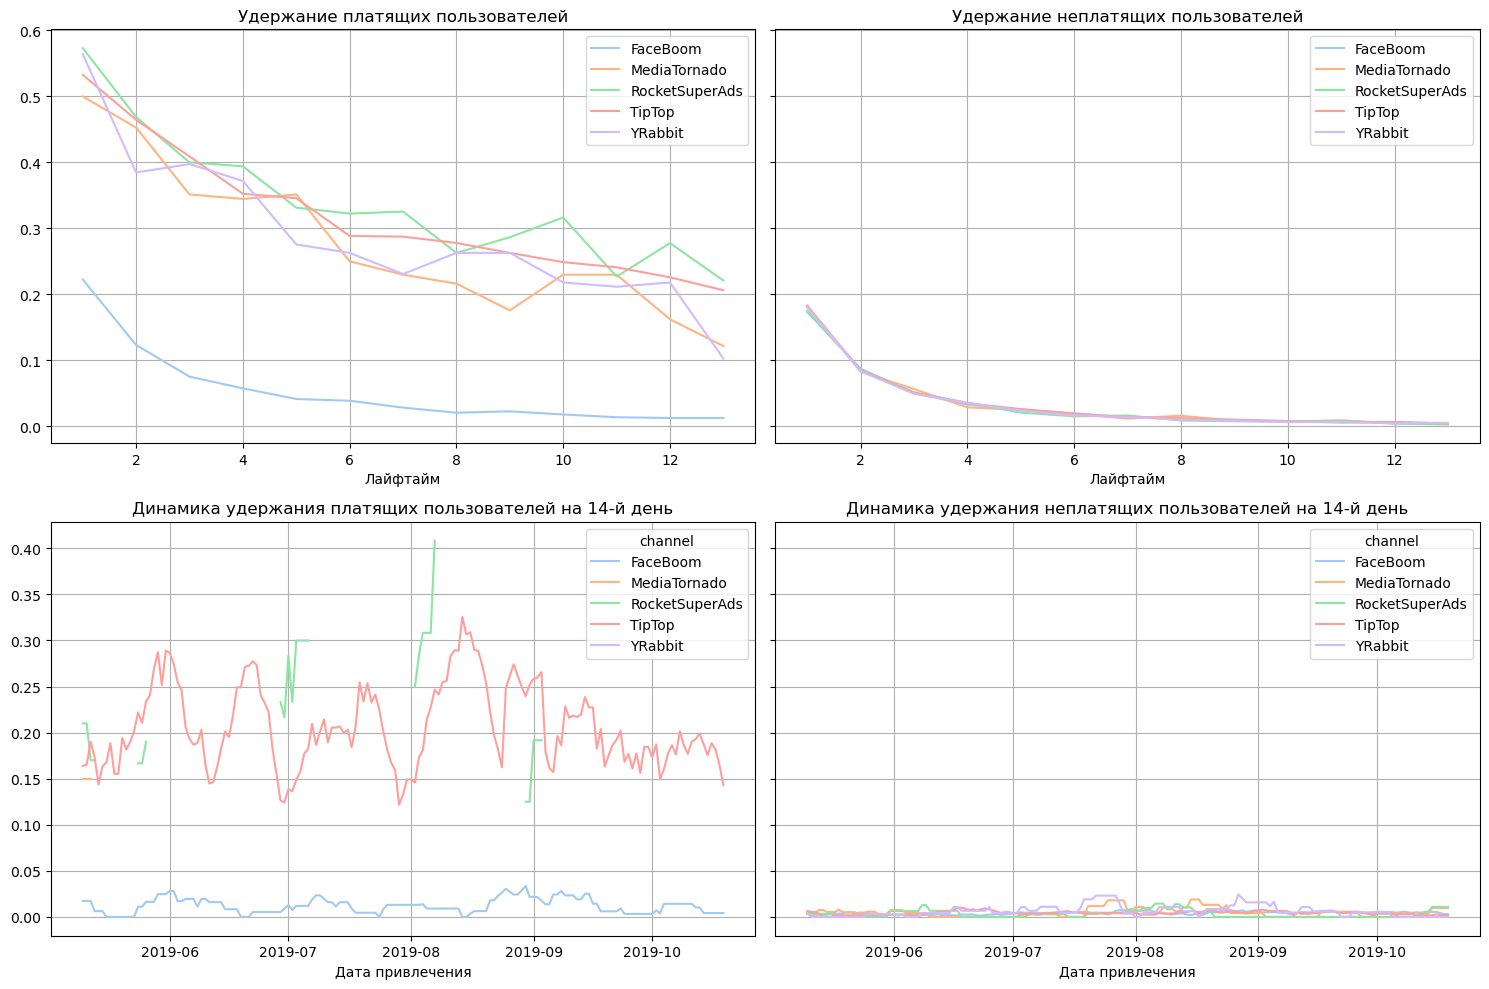

In [80]:
plot_retention(retention, retention_history, horizon_days, window=10)

Выводы: 
- По удержанию примерно у всех все стабильно, кроме FaceBoom - у этого источника удержание критически мало.

### Общий вывод:

- В целом - реклама не окупается. 
- ROI в конце периода в 14 дней — 80%. 
- По общей динамике окупаемость исчезла в июне.
- CAC растет начиная с середины мая. Значит, дело в затратах на рекламу. Окупается САС только в мае-июне, а позже не окупается. Видимо, из-за увеличения затрат на рекламу в TipTop и FaceBoom.
- Динамика LTV достаточно стабильна в определенных пределах. Значит, дело не в ухудшении качества пользователей.
- Общая конверсия пользователей достаточно стабильна.
- Удержание платящих меньше удержания неплатящих. В июне - динамика удержания платящих пользователей резко возрастает, а дальше стабилизируется в заданном диапазоне. Вероятно - сезонная история.

Выводы по странам:
- Реклама не окупается в США.
- Стоимость привлечения для США с середины мая начинает резко расти, для других стран чуть падает и стабилизируется.
- LTV достаточно стабилен.
- LTV у пользователей из США выше. Однако реклама в США не окупается, возможно, это связано с неэффективным увеличением затрат на рекламу в некоторых источниках.
- Всплески ROI в UK на 14й день могут быть связаны с какими-то локальными событиями в UK.

Выводы по устройствам:
- По всем устройствам стабильно - стоимость привлечения стабильно растет, связано это скорее всего с увеличением расходов на 2 источника рекламы TipTop и FaceBoom. 
- Окупаемость практически отсутствует. 
- По лайфтайму все стабильно, у ПК он чуть ниже, это может значить, что ПК это менее мобильное устройство. Динамика  LTV на 14 день стабильна в своих пределах, наблюдаются небольшие провалы у ПК в середине июля. На технике apple CAC выше всего, возможно связано с тем, что самые дорогие пользователи из США. Самые "дешевые" пользователи - владельцы ПК. По всем устройствам стабильно - стоимость привлечения стабильно растет, связано это с США. Окупаемость практически отсутствует. Лишь на 12 день лайфтайма окупаются пользователи, использующие ПК. Чуть недотягивают пользователи на андроидах, а владельцы техники от apple окупаются хуже всего. Динамика ROI на 14 день примечательная тем, что в лидерах находится ПК, пользователи окупаются быстрее всех, ведь они самые "дешевые".
Выводы по источникам рекламы:
- У пользователей lambdamediaAds лучшая динамика LTV.
- Лучшая динамика окупаемости у YRabbit.
- С июля по август наблюдаются всплески ROI на 14й день у YRabbit. Перспективный канал для США.
- Все пользователи окупаются, кроме пользователей, пришедших по AdNonSense, FaceBoom и TipTop. 
- CAC у всех источников стабильно, кроме TipTop. У TipTop CAC растет с середны мая стабильно на протяжении всего пероиода.
- Конверсия по устройствам распределена равномерно от 2 до 12 %. В лидерах по конверсии - FaceBoom. Меньше всего конвертируются пользователи из OppleCreativeMedia, LeapBob, MediaTomado и YRabbit (менее 5%). Динамика конверсии 14й денб стабильна, но наблюдатся всплеск у AdNonSense в начале июня.
- У пользователей от AdNonSense и FaceBoom очень низкое удержание - примерно на 30% меньше, чем у остальных.

Выводы по анализу источников рекламы в США:
- Проблемные источники FaceBoom и TipTop. Они не окупаются. При этом:
    - У TipTop CAC стабильно растет
    - У FaceBoom CAC стабильный
- Перспективные - YRabbit, MediaTornado и RocketSuperAds, при этом:
    - LTV выше у RocketSuperAds
    - ROI выше у YRabbit (из-за низкой цены на рекламу).
    - CAC у YRabbit чуть выше, чем у MediaTornado и RocketSuperAds
- По конверсии лидируют FaceBoom и TipTop, но они убыточны
- По окупаемым источникам максимальная конверсия у RocketSuperAds, YRabbit и MediaTornado ниже примерно на 15%
- По удержанию примерно у всех все стабильно, кроме FaceBoom - у этого источника удержание критически мало.

### Напишите выводы

- Основная причина неэффективности привлечения пользователей это высокая стоимость CAC по источникам FaceBoom и TipTop. Так как данные источники используются только в США - окупаемость пользователей из США - низкая. В то время как сами пользователи имеют самую большую конверсию (терять их нельзя). Проблему отсутствия окупаемости у TipTop можно решить с помощью запроса спецаильного предложения по стоимости рекламы, проблема только в расутщем CAC. А вот у FaceBoom помимо отсутствия окупаемости, еще и критически малое значение удержания, при стабильной CAC. Низкое удержание (может быть связано с конкуренцией в конкретном источнике, либо с совместимостью с техникой apple). В любом случае хорошо было бы провести опрос.

Рекомендация:
- Выяснить причину низкого удержания пользователей из FaceBoom. Как вариант - с помощью опросов.
- Договориться о скидке на рекламу в TipTop, в противном случае отказаться от источника (хоть и качество пользователей оттуда неплохое)
- Перенаправить затраты на рекламу в перспективный источник - RocketSuperAds (высокий LTV, низкий CAC, высокая конверсия). Так же стоит обратить внимание на YRabbit (высокий ROI).